# Online Shoppers Purchasing Intention 

Project 1: Classifying the online shoppers purchasing intention

Team members:
- 471538 - Abishai Srinivasan
- 469304 - Gurusaran Sivakumar
- 469312 - Keerthana Karunanithi
- 470389 - Subhiksha Arcot Praburam

## Task Description:  
 
This project aims to predict whether an online shopper will *buy* or *not buy* a product based on various session features like time spent on pages, bounce rates, exit rates, and user behavior. The target variable, *Revenue*, indicates if a transaction was completed.
## Motivation:  
Understanding customer behavior helps e-commerce businesses optimize user experiences, personalize recommendations, and improve sales. Predicting purchasing intention allows businesses to focus on users who are more likely to convert, enhancing overall sales and marketing efforts.

## Advantages:
- *Improves sales conversion*: Identifying likely buyers helps optimize their experience and increase conversion rates.
- *Personalization*: Enables real-time recommendations and offers for higher engagement.
- *Better marketing efficiency*: Focus marketing efforts on users more likely to purchase, maximizing ROI.
- *Actionable insights*: Helps identify areas needing improvement (e.g., high bounce rates or low engagement).
- *Scalable*: The model can handle large datasets, benefiting businesses of all sizes.

### Numerical Features:
- **Administrative**: Number of pages visited in the "Administrative" category.
- **Administrative_Duration**: Total time (in seconds) spent on "Administrative" pages.
- **Informational**: Number of pages visited in the "Informational" category.
- **Informational_Duration**: Total time (in seconds) spent on "Informational" pages.
- **ProductRelated**: Number of pages visited in the "Product Related" category.
- **ProductRelated_Duration**: Total time (in seconds) spent on "Product Related" pages.
- **BounceRates**: Percentage of visitors who leave the site after viewing a single page.
- **ExitRates**: Percentage of users who exit from a specific page.
- **PageValues**: Average value of a page visited before completing a transaction.
- **SpecialDay**: Value indicating closeness to a special day (e.g., Valentine’s Day).

### Categorical Features:
- **Month**: The month when the session occurred.
- **OperatingSystems**: Identifier for the operating system used by the visitor.
- **Browser**: Identifier for the browser used by the visitor.
- **Region**: Identifier for the region of the visitor.
- **TrafficType**: Type of traffic (e.g., direct, search, referral).
- **VisitorType**: Whether the visitor is "New Visitor", "Returning Visitor", or "Other".
- **Weekend**: Indicates if the visit occurred on a weekend (binary: 0 or 1).
- **Revenue**: Target variable indicating if the visitor made a purchase (binary: 0 or 1).

Running time of the notebook: 10 to 13 minutes.

# Libraries

In [174]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
matplotlib.style.use('ggplot')
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

# Import libraries for machine learning model selection and evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score

# Import cross_val_score for cross-validation of model performance
from sklearn.model_selection import cross_val_score

# Import libraries for preprocessing and feature engineering
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector  # Added SequentialFeatureSelector

# Import permutation importance
from sklearn.inspection import permutation_importance  # Added this line

# Import machine learning models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Import libraries for parallel processing
from joblib import Parallel, delayed

# Import library for handling warnings
import warnings


# Reading and Analyzing the Data Types
Goal:
In this section, we aim to load the dataset into a DataFrame for structured analysis, understand its structure by inspecting its size, data types, and unique values, and identify any data quality issues such as duplicates or missing values for appropriate handling.

In [176]:
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv('online_shoppers_intention.csv')

In [177]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [178]:
# Get the number of rows and columns in the dataset
df.shape

(12330, 18)

In [179]:
# Display the data types of each column in the dataset
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

How many distinct values does each column have?

In [181]:
# Get the number of unique values in each column
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [182]:
# Identify duplicate rows in the dataset
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 125


In [183]:
# Extract and display the duplicate rows from the dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

       Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0 

In [184]:
# Get the unique values in the 'Month' column  
unique_month = df["Month"].unique()
print(unique_month)

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


Checking unique Visitor types in the data

In [186]:
# Get the unique values in the 'VisitorType' column
unique_visitor = df["VisitorType"].unique()
print(unique_visitor)

['Returning_Visitor' 'New_Visitor' 'Other']


In [187]:
# Get summary statistics of the numerical columns in the dataset
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [188]:
# Check for missing values in the 'Weekend' and 'Revenue' columns
missing_values = df[['Weekend', 'Revenue']].isnull().sum()

# Print the count of missing values for these columns
print("Missing values in categorical columns:")
print(missing_values)

Missing values in categorical columns:
Weekend    0
Revenue    0
dtype: int64


#### Summary after Analysis:
- The dataset has a shape of 12,330 rows and 18 columns.
- We examined unique values for each categorical column.
- Checked for duplicates: Found 125 duplicate records, but they are entries with different category column inputs.
- We have no missing values in the dataset.

# Exploratory Data Analysis
Goal: In this section, we conducted a thorough Exploratory Data Analysis (EDA) to understand the dataset and prepare it for modeling.

In [191]:
# Create a copy of the original DataFrame to avoid modifying the original data
df_analysis = df.copy()

# Convert the specified columns to 'object' type (for categorical data)
df_analysis['OperatingSystems'] = df_analysis['OperatingSystems'].astype('object')
df_analysis['Browser'] = df_analysis['Browser'].astype('object')
df_analysis['Region'] = df_analysis['Region'].astype('object')
df_analysis['TrafficType'] = df_analysis['TrafficType'].astype('object')

In [192]:
# Calculate the count of True and False values in the 'Revenue' column
true_count = df_analysis['Revenue'].sum()  # Counts True values (True is treated as 1)
false_count = len(df_analysis) - true_count  # Counts False values (total rows - True values)

# Calculate the percentage of True and False values
total = len(df_analysis)
true_percentage = (true_count / total) * 100
false_percentage = (false_count / total) * 100

# Prepare data for the Pie chart
labels = ['True', 'False']
values = [true_percentage, false_percentage]

# Create a Pie chart with customized colors
colors = ['pink','lightblue']
fig = go.Figure(data=go.Pie(labels=labels, values=values, marker=dict(colors=colors)))

# Customize the appearance of the Pie chart
fig.update_traces(hoverinfo='label+percent', textfont_size=20)

# Set the title and font size of the chart 
fig.update_layout(title="Distribution of Revenue Column", font_size=18)

# Show plot
fig.show()

 Revenue Insights:
- **Conversion Rate**: Only 15.5% of the transactions resulted in a sale.

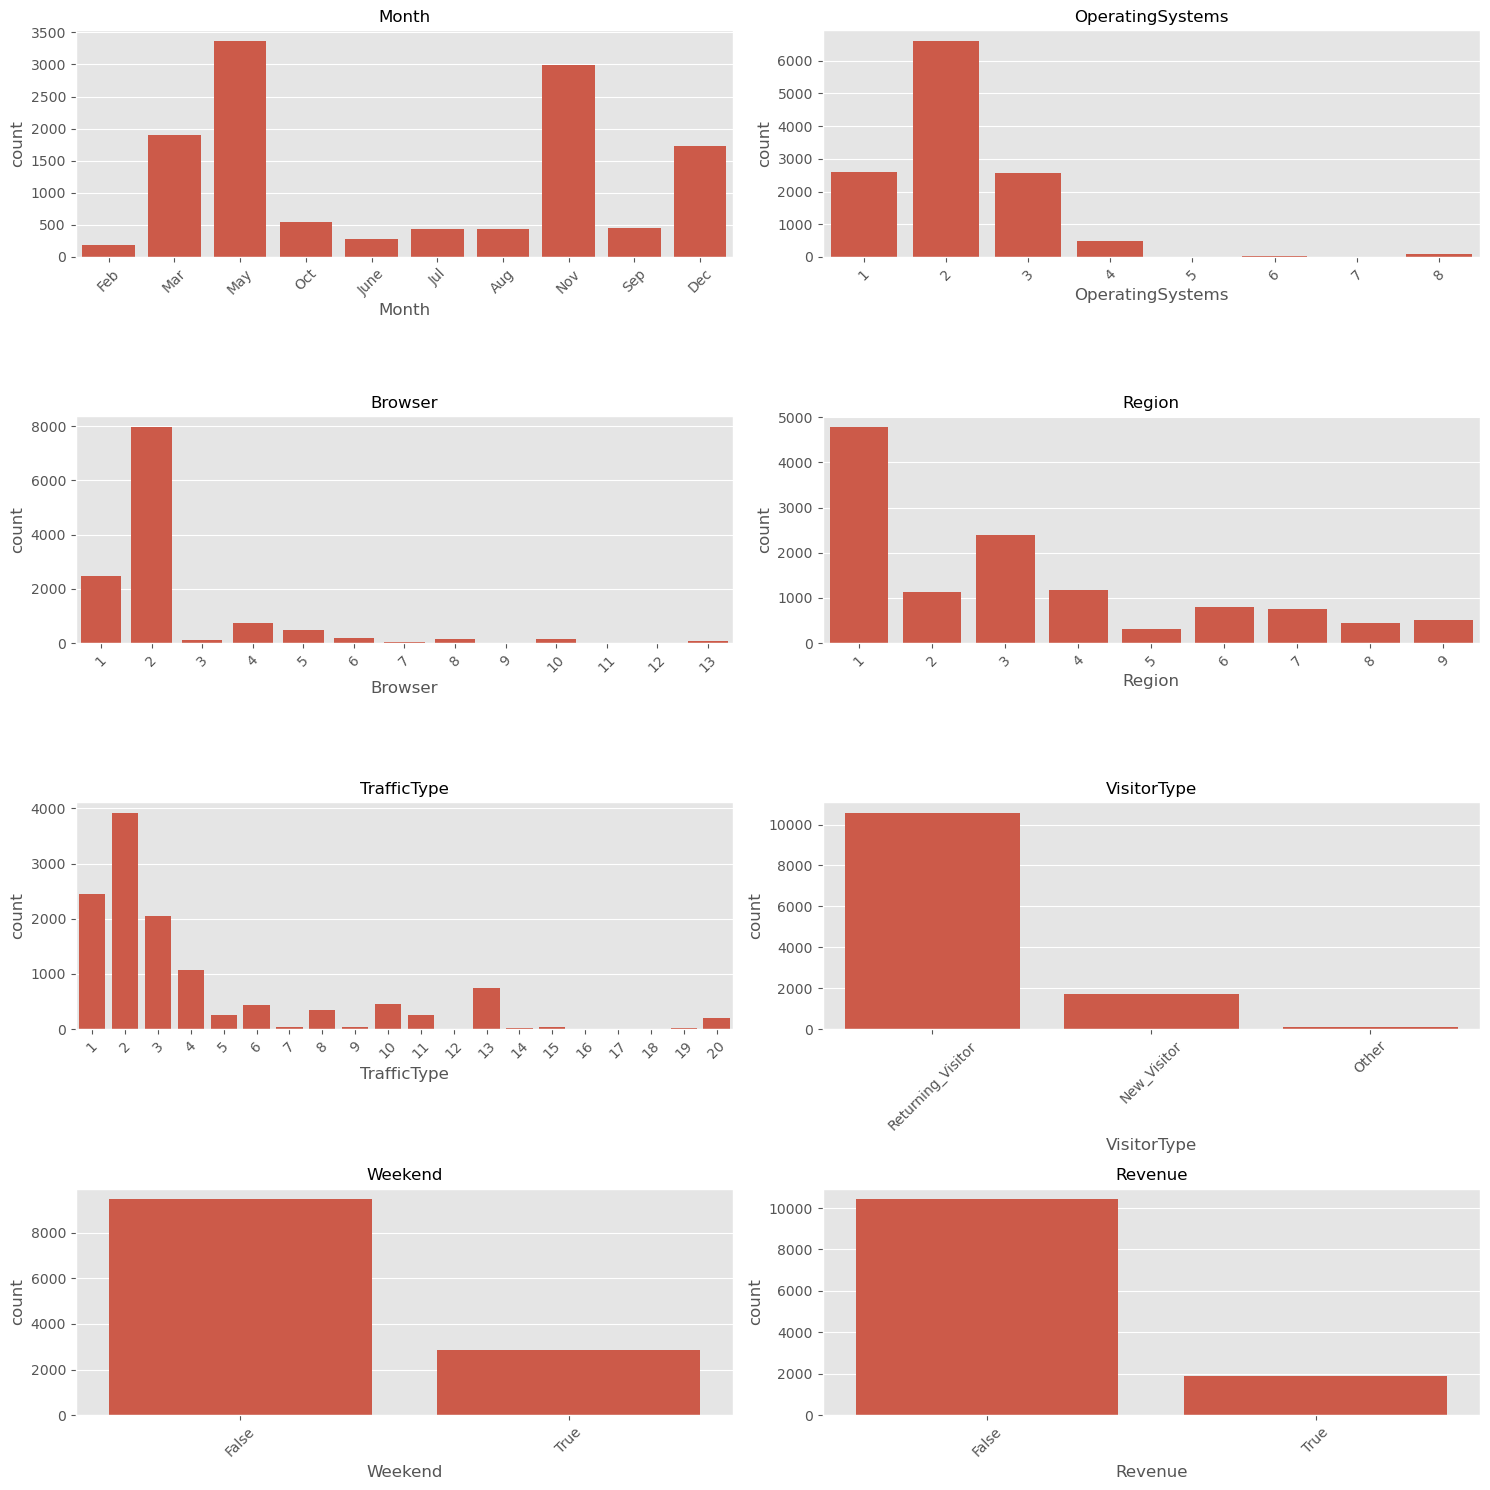

In [194]:
# Get the columns that are of type 'object' or 'bool' (categorical or boolean columns)
cols = df_analysis.select_dtypes(include=['object', 'bool']).columns

# Define the number of rows and columns for the grid layout of subplots
rows = 4
cols_count = 2

# Create the figure and axes for a 2x2 grid of subplots
fig, axes = plt.subplots(rows, cols_count, figsize=(15, 15))

# Flatten the axes array to make it easier to iterate over for plotting
axes = axes.flatten()

# Loop through each categorical column and plot a countplot for it on the corresponding axis
for i, column in enumerate(cols):
    sns.countplot(x=column, data=df, ax=axes[i])  # Specify the axis for each plot
    axes[i].set_title(column, fontsize=12)  # Set title for each plot
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust the layout to ensure subplots fit neatly within the figure
plt.tight_layout()

# Display the plots 
plt.show()

 Key Insights:
- **Session Frequency**: The highest number of sessions occurred in May, followed by November.
- **Visitor Preferences**: Most visitors used Operating System 2 and Browser 2. The majority of traffic was of Type 2.
- **Visitor Types**: There are three types of visitors, with the majority being Returning Visitors.
- **Weekend Visits**: Most visits did not occur during the weekend.
- **Revenue**: The majority of visitors did not make a purchase.

One Hot Encoding

In [197]:
# Create dummy variables for the 'Month' and 'VisitorType' columns 
# This will convert categorical values into True or False for each category
df_encoded = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=False)

In [198]:
# Display the first 5 rows of the encoded DataFrame to verify the transformation
df_encoded.head(5)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...      False       False   
1         0.00       0.10         0.0         0.0  ...      False       False   
2         0.20       0.20         0.0         0.0  ...      False       False   
3         0.05       0.14         0.0         0.0  ...      False       False   
4         0.02       0.05         0.0         0.0  ...      False       False   

   Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0      False      False      False      False      False   
1      False      False      False      False      False   
2      False      False      False      False      False   
3      False      False      False      False      False   
4      False      False      False      False      False   

   VisitorType_New_Visitor  VisitorType_Other  VisitorType_Returning_Visitor  
0                    False              False                           True  
1                    False              False                           True  
2                    False              False                           True  
3                    False              False                           True  
4                    False              False                           True  

[5 rows x 29 columns]

Results: We converted the "Month" and "Visitor Type" columns into binary (True/False) columns, with each of the 10 months and 3 Visitor Types options are represented as separate columns.

In [200]:
# Convert boolean 'Weekend' and 'Revenue' columns into binary (1 for True, 0 for False)
df_encoded['Weekend'] = df_encoded['Weekend'].apply(lambda x: 1 if x is True else 0)
df_encoded['Revenue'] = df_encoded['Revenue'].apply(lambda x: 1 if x is True else 0)

In [201]:
# Convert the specified columns to integer type (from boolean)
columns_to_convert = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
                      'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 
                      'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 
                      'VisitorType_Other', 'VisitorType_Returning_Visitor']

# Apply the conversion to integer type for the selected columns
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].apply(lambda x: x.astype(int))

In [202]:
# Print the selected columns to verify the transformation and data types
print(df_encoded[['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
          'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 
          'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 
          'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend', 'Revenue']])

       Month_Aug  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  \
0              0          0          1          0           0          0   
1              0          0          1          0           0          0   
2              0          0          1          0           0          0   
3              0          0          1          0           0          0   
4              0          0          1          0           0          0   
...          ...        ...        ...        ...         ...        ...   
12325          0          1          0          0           0          0   
12326          0          0          0          0           0          0   
12327          0          0          0          0           0          0   
12328          0          0          0          0           0          0   
12329          0          0          0          0           0          0   

       Month_May  Month_Nov  Month_Oct  Month_Sep  VisitorType_New_Visitor  \
0        

In [203]:
# Print all column names in the encoded DataFrame to see the transformed dataset structure
df_encoded.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [204]:
df_encoded.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...          0           0   
1         0.00       0.10         0.0         0.0  ...          0           0   
2         0.20       0.20         0.0         0.0  ...          0           0   
3         0.05       0.14         0.0         0.0  ...          0           0   
4         0.02       0.05         0.0         0.0  ...          0           0   

   Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0          0          0          0          0          0   
1          0          0          0          0          0   
2          0          0          0          0          0   
3          0          0          0          0          0   
4          0          0          0          0          0   

   VisitorType_New_Visitor  VisitorType_Other  VisitorType_Returning_Visitor  
0                        0                  0                              1  
1                        0                  0                              1  
2                        0                  0                              1  
3                        0                  0                              1  
4                        0                  0                              1  

[5 rows x 29 columns]

In [205]:
# Select only numeric columns from the DataFrame for correlation calculation
numeric_df = df_encoded.select_dtypes(include=['number'])

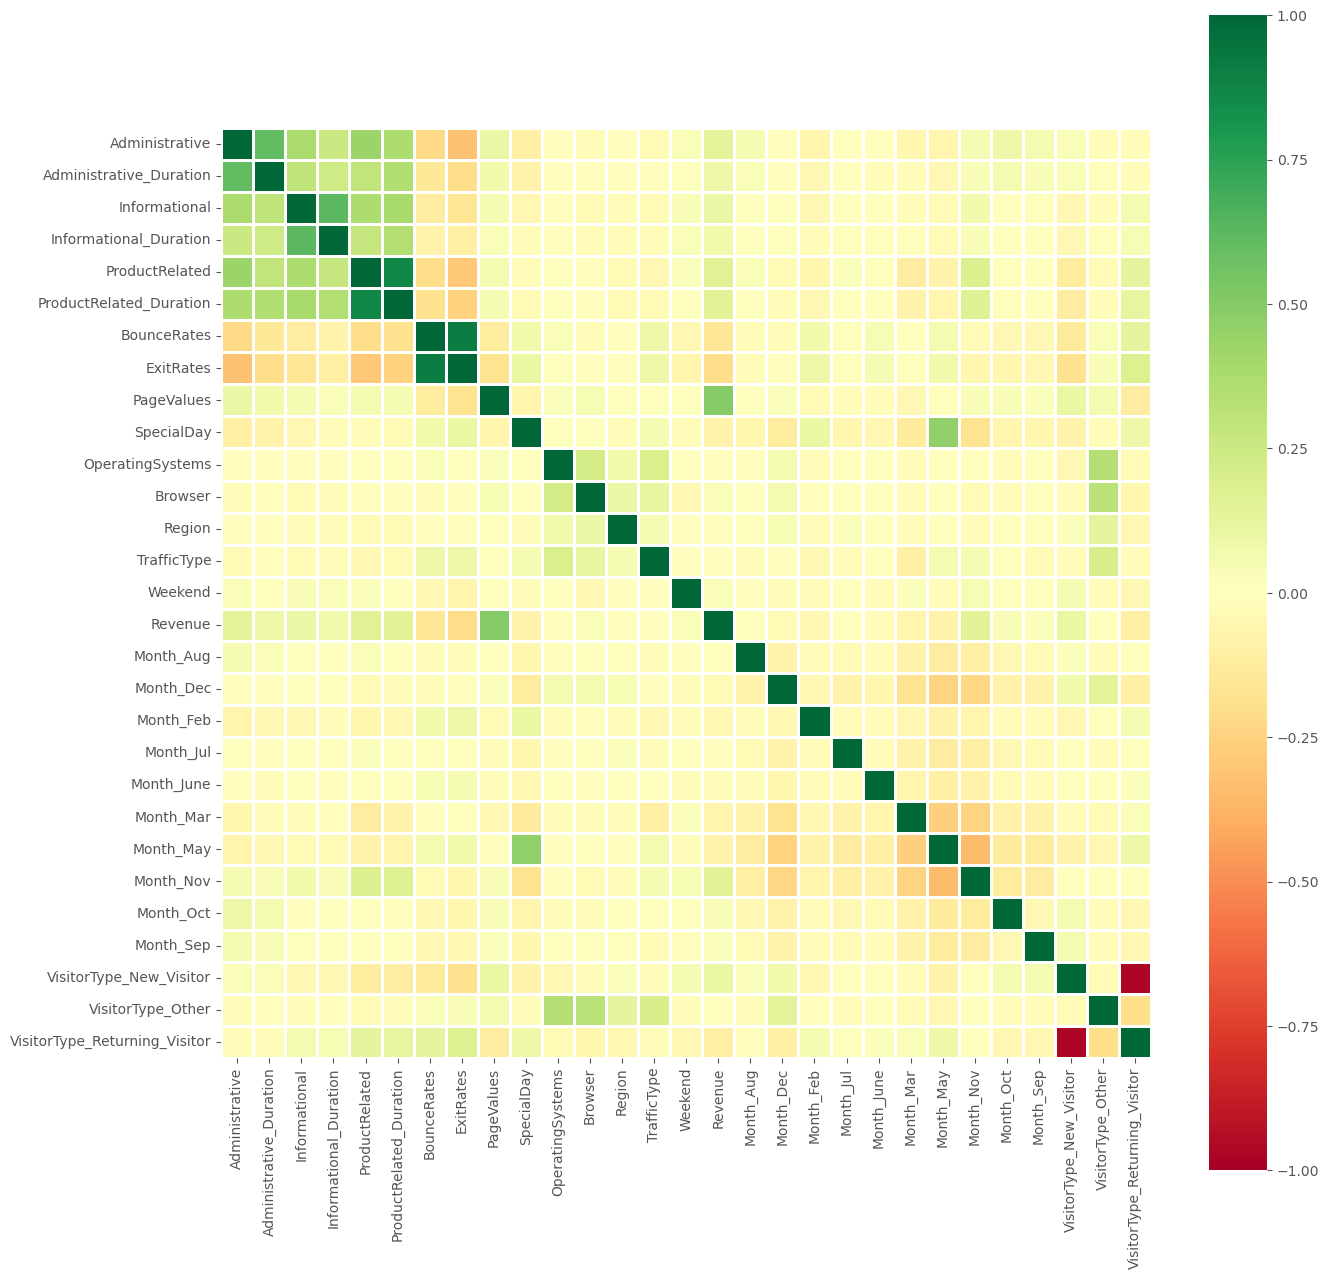

In [206]:
# Plot a heatmap to visualize the correlation matrix of numeric columns
fig, ax = plt.subplots(figsize=(15,15)) # Create a figure and axes for the heatmap 
sns.heatmap(numeric_df.corr(), square=True, linewidths=1, annot=False, cmap=plt.cm.RdYlGn, vmin=-1, vmax=1, annot_kws={"size": 8}, ax=ax); #if errors, update seaborn and restart VScode

 **Correlation Heatmap Insights**:

1. **Bounce Rate & Exit Rate**: We observed strong positive correlation (0.91). Which means as bounce rate increases, exit rate also increases.
2. **Visitor Type (New vs Returning)**: Strong negative correlation (-0.97). New and returning visitors are mutually exclusive. Which suggests that as one increases, the other decreases.

While this indicates redundancy and  multicollinearity, we chose not to drop any columns for now and continued with outlier detection to evaluate how the models perform with the existing features.

Checking for outliers

C:\Users\gurus\AppData\Local\Temp\ipykernel_33460\4077708600.py:3: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



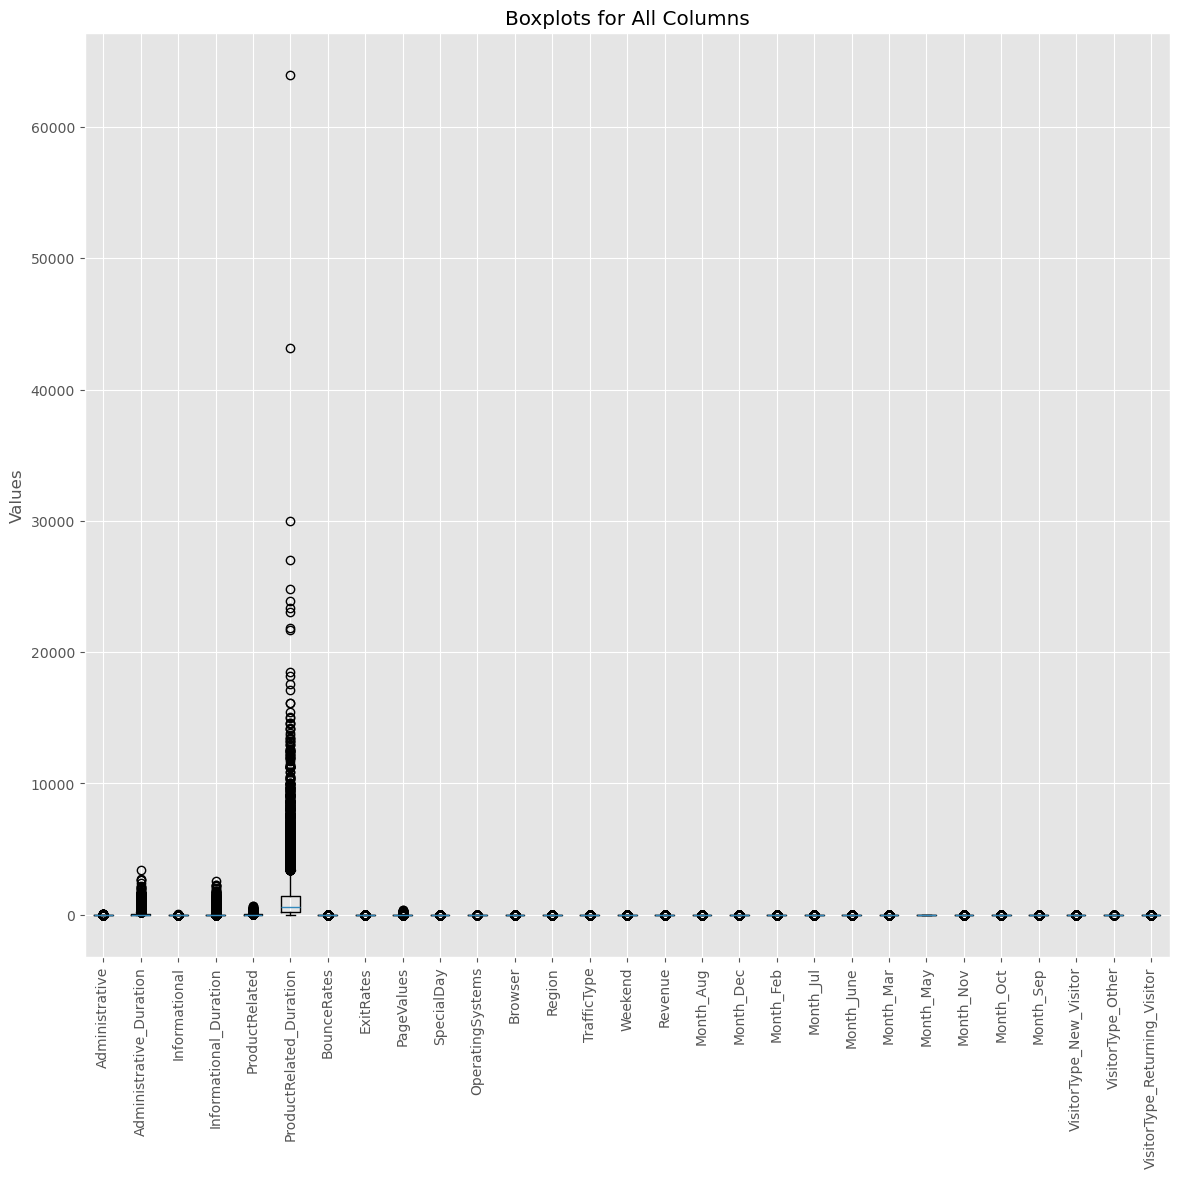

In [209]:
# Create boxplots for all numeric columns to visualize the distribution and detect outliers
plt.figure(figsize=(14, 12)) # Set the figure size
plt.boxplot(numeric_df.values, labels=numeric_df.columns) # Plot the boxplots
plt.title("Boxplots for All Columns")  # Add title to the plot
plt.ylabel("Values") # Label for the y-axis
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.show() # Display the plot

The chart above indicates the presence of outliers in the dataset. Since our data consists of time-based records, these outliers may signify important events, anomalies, or critical changes in the underlying process.

We are retaining these outliers, as they may represent legitimate and meaningful records in the time series. Eliminating them could result in the loss of valuable information and lead to data misinterpretation. Instead of removing them, we will treat them as high-leverage points for the model.


<Figure size 1400x1200 with 0 Axes>

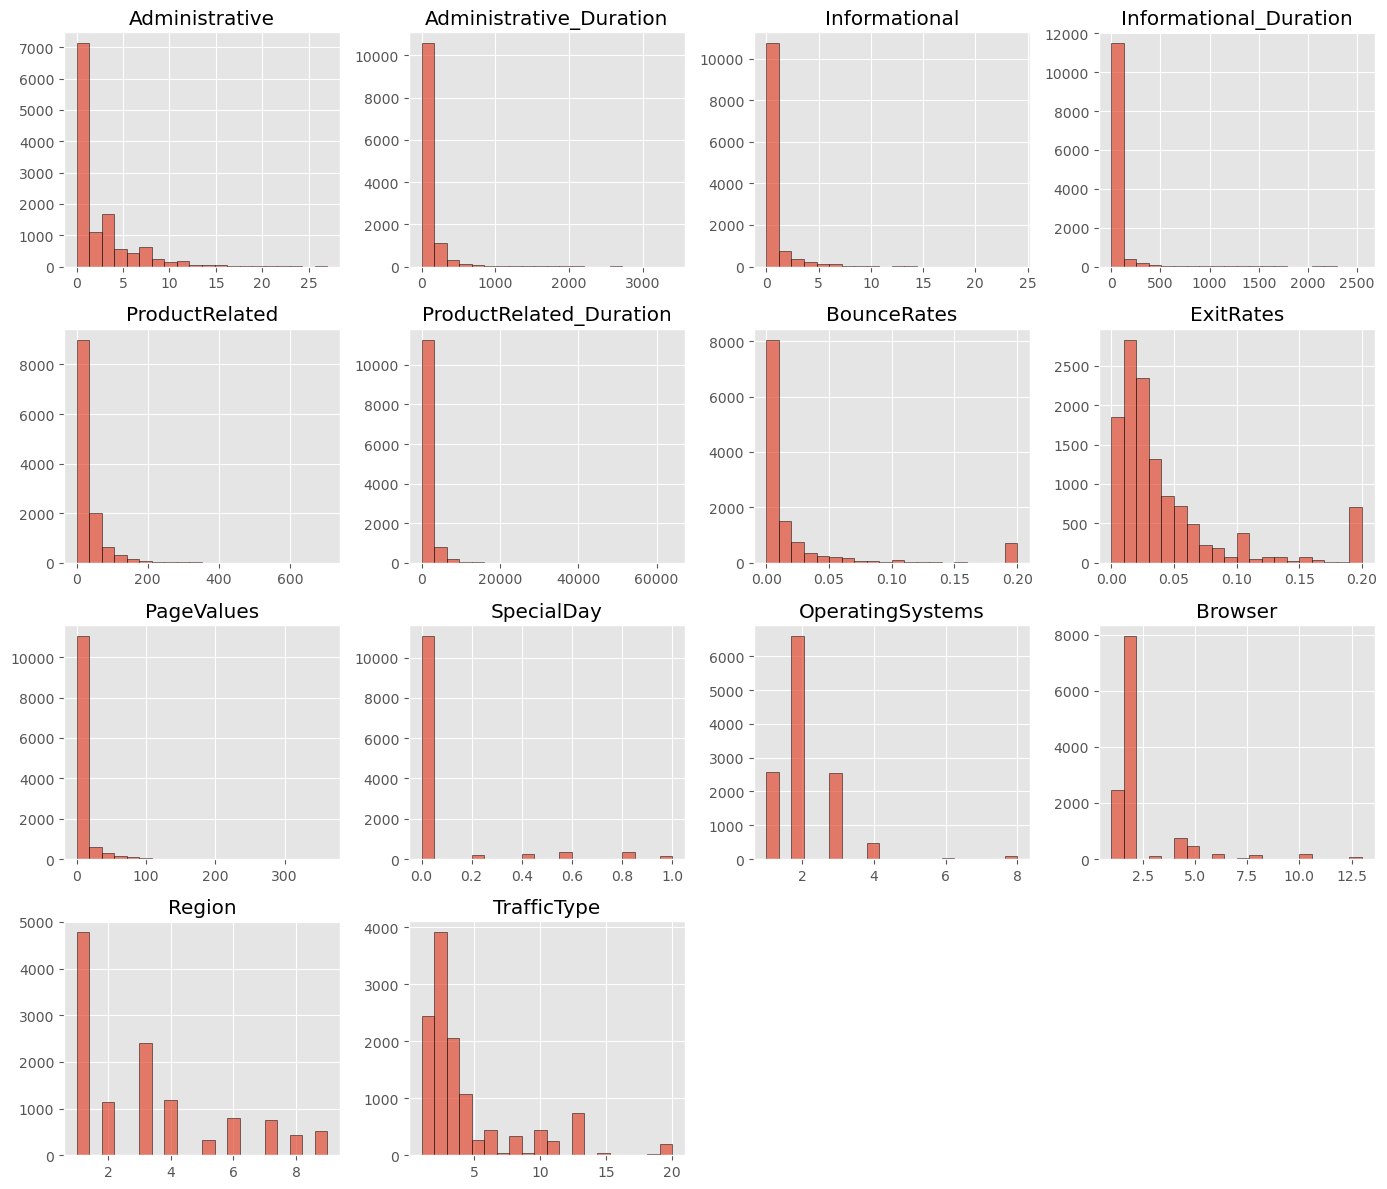

In [211]:
# List of columns to exclude from the histogram plots
excluded_columns = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 
                    'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 
                    'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 
                    'VisitorType_Other']

# Filter the DataFrame to exclude the specified columns
columns_to_plot = [col for col in df.columns if col not in excluded_columns]

# Plot histograms for the remaining columns
plt.figure(figsize=(14, 12)) # Set figure size
df[columns_to_plot].hist(bins=20, edgecolor='black', alpha=0.7, figsize=(14, 12)) # Create histograms with 20 bins
plt.tight_layout() # Adjust layout for better spacing
plt.show() # Display the plot

We have created visualizations (graphs) for a few columns to better understand the distribution of numerical features in the dataset.
These visuals helped us in identifying patterns, skewness, or potential outliers, which are crucial for gaining insights into the data's structure and behavior.

Summary of Analysis:

- The dataset reveals a low conversion rate, with only a small percentage of visitors making a purchase.
- Visitor behavior patterns show peak activity in specific months, with returning visitors being the dominant group. 
- Certain features exhibit strong correlations, but we are not addressing them at this stage. Instead, we will apply feature selection methods to identify the most relevant features.
- Outliers, which may indicate important trends or anomalies, have been retained for further analysis rather than removal.
- Visualizations played a crucial role in understanding the data distribution, uncovering patterns, and identifying potential issues that could impact modeling.

# Modeling
Goal: We have used three modeling techniques:
1. **SVC:** We used SVC to handle high-dimensional data and capture complex relationships between user behavior and purchase intention.  
2. **SVM:** We chose SVM to identify optimal decision boundaries, especially in high-dimensional and non-linear data.  
3. **Logistic Regression:** We implemented Logistic Regression for its simplicity and interpretability, providing insights into the relationship between features and purchase intention.  

To enhance model efficiency and accuracy, we applied the forward feature selection method, which identified the most relevant features while reducing redundancy.

We prioritized **recall** to focus on identifying shoppers who are likely to make a purchase and used **K-fold cross-validation** to validate the model’s performance, improve accuracy, and minimize bias.


In [215]:
# Separate the features (X) and target variable (y)
X = df.drop('Revenue', axis=1) # Drop the 'Revenue' column from the DataFrame to get the features
y = df['Revenue'] # Store the 'Revenue' column as the target variable

In [216]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=0)
# Here, we use 80% of the data for training and 20% for testing.

# Set up StratifiedKFold cross-validation with 5 splits
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [217]:
# Define categorical columns (object or category type) and numerical columns (other types)
categoricals = X.select_dtypes(include=['object', 'category']).columns.tolist()
# This will select columns that are of type 'object' or 'category', which are typically categorical variables.

# This will select columns that are not of type 'object' or 'category', typically numerical variables.
numericals = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [218]:
# Define transformers for categorical and numerical columns
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),  # Replace missing values in categorical columns with the most frequent value
    OneHotEncoder() # Encode categorical variables into a one-hot format
)

# Define a ColumnTransformer to apply transformations on both numerical and categorical columns
transformer = ColumnTransformer(transformers=[
    ('numerical', StandardScaler(), numericals), # Scale numerical columns using StandardScaler
    ('categorical', categorical_transformer, categoricals)  # Apply the categorical transformer to categorical columns
])
# Apply the transformation on the data
X_transformed = transformer.fit_transform(df) # Fit and transform the data according to the defined transformer

## SVC 

### SVC without Feature Selection without Recall 

In [221]:
# Create a pipeline for the model, which includes:
svc_pipeline = make_pipeline(
    transformer, # The data transformation steps (scaling, encoding, etc.)
    SelectKBest(score_func=f_classif), # Feature selection using the ANOVA F-value to select the best features
    SVC(kernel='linear') # Support Vector Classifier (SVC) with a linear kernel for classification
)

In [222]:
# Define GridSearchCV applied to the entire pipeline
grid_search = GridSearchCV(
    estimator=svc_pipeline, # The pipeline that includes preprocessing, feature selection, and SVC
    param_grid={
        'selectkbest__k': [5],  # Number of top features to select for training
        'svc__C': np.logspace(-1, 1, 2)  # Regularization parameter (C) values to test
    },
    verbose=True, # Display detailed logs of the process
    n_jobs=1, # Run jobs sequentially (can be set to -1 for parallel processing)
    cv=kfold # Perform cross-validation using stratified k-fold
)

In [223]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'S...
                                                                          'OperatingSystems',
                                                                          'Browser',
                                                                          'Region',
                                                                          'TrafficType',
                                                                          'Weekend']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Month',
                                                                          'VisitorType'])])),
                                       ('selectkbest', SelectKBest()),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=1,
             param_grid={'selectkbest__k': [5], 'svc__C': array([ 0.1, 10. ])},
             verbose=True)

In [224]:
# Get the best estimator (model with the optimal hyperparameters)
best_svc_withoutFeatureRecall = grid_search.best_estimator_
# Print the best hyperparameter values found by GridSearchCV
print("Best SVC Parameters:", grid_search.best_params_)

Best SVC Parameters: {'selectkbest__k': 5, 'svc__C': 10.0}


Optimal SVC parameters were identified, enhancing model performance with 5 key features and regularization parameter C=10.

In [226]:
# Make predictions on the test set using the best trained model
svc_pred_withoutFeatureRecall = best_svc_withoutFeatureRecall.predict(X_test)

# Calculate evaluation metrics for model performance
accuracy = accuracy_score(y_test, svc_pred_withoutFeatureRecall) * 100 # Percentage accuracy
recall = recall_score(y_test, svc_pred_withoutFeatureRecall) * 100 # Percentage recall (sensitivity)
precision = precision_score(y_test, svc_pred_withoutFeatureRecall) * 100 # Percentage precision
f1 = f1_score(y_test, svc_pred_withoutFeatureRecall) * 100 # F1 Score (harmonic mean of precision & recall)

# Store computed metrics in a DataFrame for easy reference and visualization
svc_withoutFeatures_withoutRecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Value': [accuracy, recall, precision, f1]
})

### SVC without Feature Selection with Recall

In [228]:
# Define a pipeline that includes preprocessing, feature selection, and classification
svc_pipeline_rec_fs = make_pipeline(
    transformer,  # Preprocessing step: applies scaling to numerical features and one-hot encoding to categorical features
    SelectKBest(score_func=f_classif),  # Feature selection: selects the best features based on ANOVA F-score
    SVC(kernel='linear') # Classification: Support Vector Classifier with a linear kernel
)

In [229]:
# Define GridSearchCV to find the best hyperparameters for the pipeline
grid_search_rec_fs = GridSearchCV(
    estimator=svc_pipeline_rec_fs,  # Use the previously defined pipeline with preprocessing, feature selection, and SVC
    param_grid={
        'selectkbest__k': [5],  # Number of best features to select
        'svc__C': np.logspace(-1, 1, 2)  # Regularization parameter C values (10^(-1) to 10^(1))
    },
    verbose=True,  # Enables detailed output during the search process
    n_jobs=1,  # Run the grid search with a single core (adjust as needed for parallel processing)
    cv=kfold,  # Perform cross-validation using Stratified K-Folds
    scoring='recall'  # Optimize for recall, prioritizing minimizing false negatives
)

In [230]:
# Fit the GridSearchCV model using the training data
grid_search_rec_fs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'S...
                                                                          'Browser',
                                                                          'Region',
                                                                          'TrafficType',
                                                                          'Weekend']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Month',
                                                                          'VisitorType'])])),
                                       ('selectkbest', SelectKBest()),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=1,
             param_grid={'selectkbest__k': [5], 'svc__C': array([ 0.1, 10. ])},
             scoring='recall', verbose=True)

In [231]:
# Retrieve the best model found by GridSearchCV after tuning hyperparameters
best_svc_withoutFeaturewithRecall = grid_search_rec_fs.best_estimator_
# Print the best hyperparameters selected during GridSearchCV
print("Best SVC Parameters:", grid_search_rec_fs.best_params_)

Best SVC Parameters: {'selectkbest__k': 5, 'svc__C': 10.0}


Optimal SVC parameters identified, enhancing model performance with 5 key features and C=10.

In [233]:
# Make predictions using the best model with recall optimization on the test data
svc_pred_withoutFeaturewithRecall = best_svc_withoutFeaturewithRecall.predict(X_test)

# Calculate evaluation metrics: Accuracy, Recall, Precision, and F1 Score, and multiply by 100 for percentage
accuracy = accuracy_score(y_test, svc_pred_withoutFeaturewithRecall) * 100
recall = recall_score(y_test, svc_pred_withoutFeaturewithRecall) * 100
precision = precision_score(y_test, svc_pred_withoutFeaturewithRecall) * 100
f1 = f1_score(y_test, svc_pred_withoutFeaturewithRecall) * 100

# Store the calculated metrics in a DataFrame for easy comparison
svc_withoutFeatures_withRecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Value': [accuracy, recall, precision, f1]
})

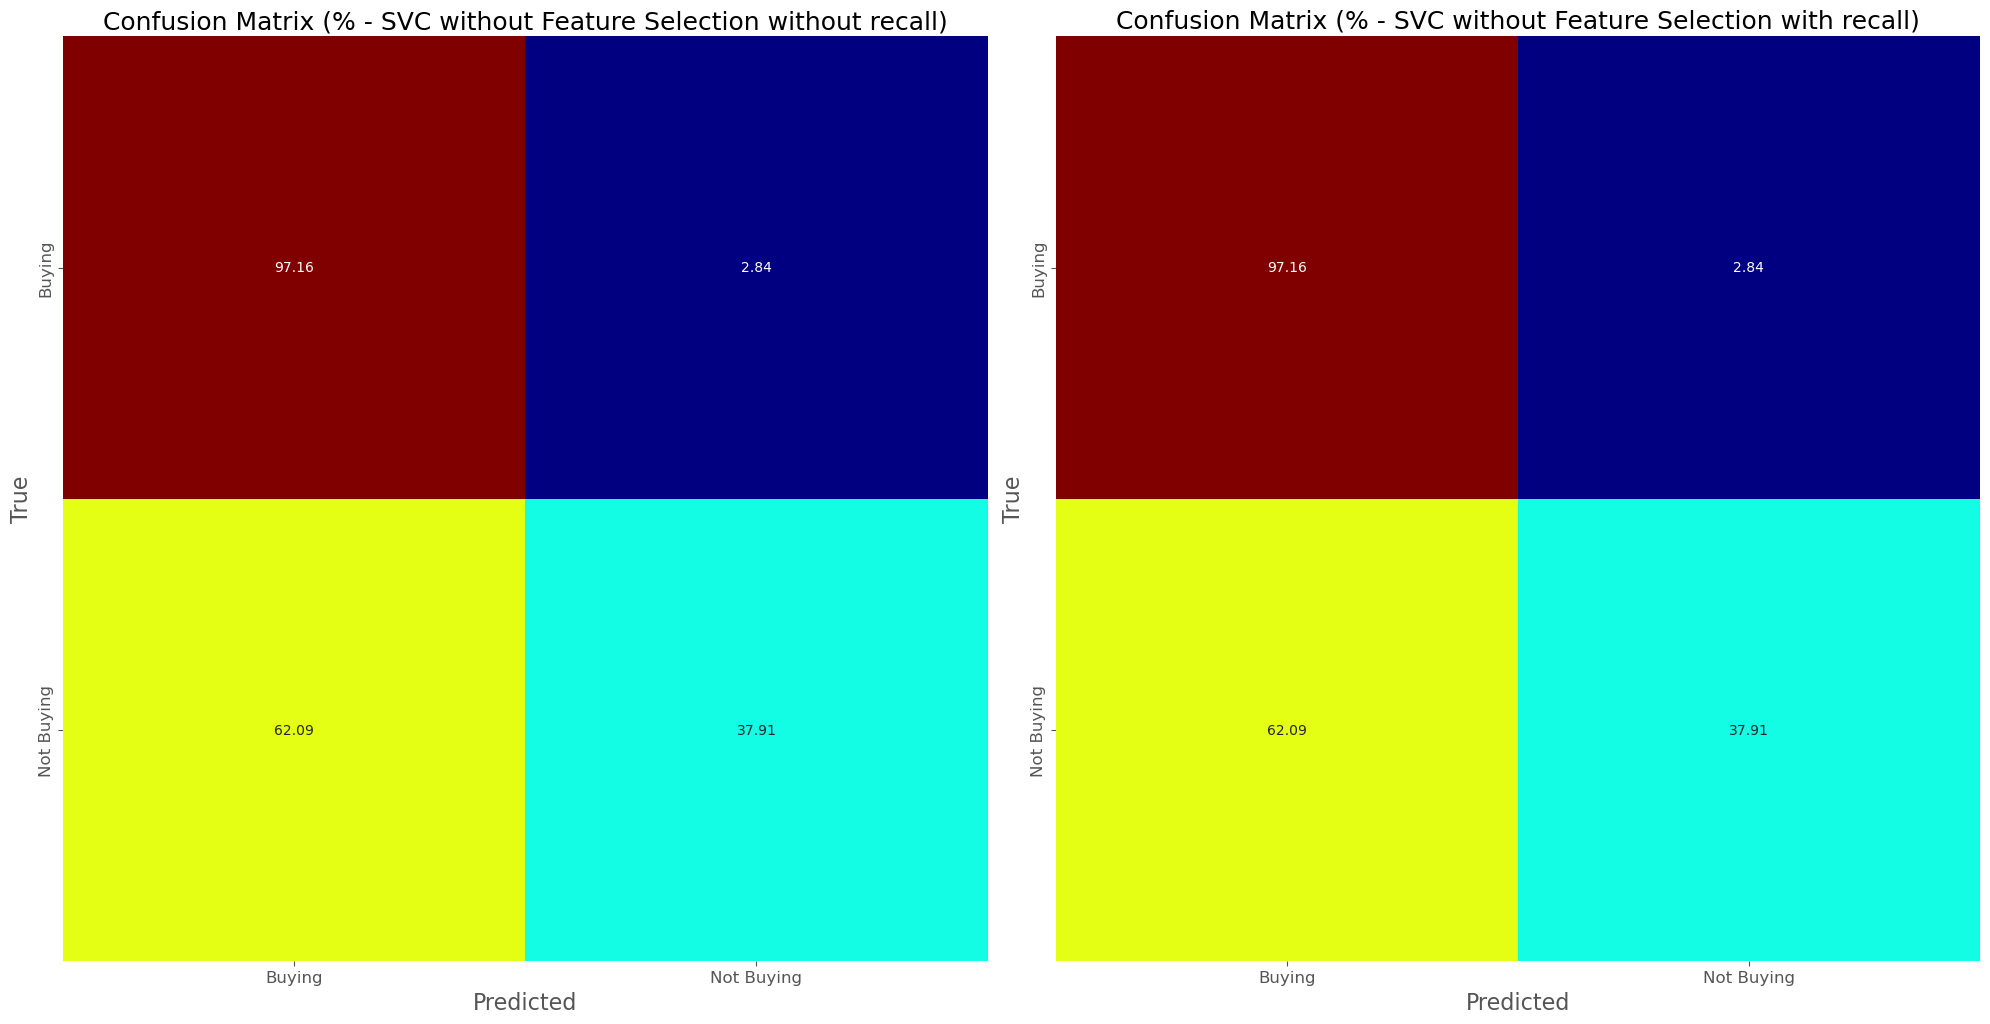

In [234]:
# Compute the confusion matrix for the first model (without recall optimization)
cm_withoutRecall = confusion_matrix(y_test, svc_pred_withoutFeatureRecall)

# Normalize the confusion matrix to percentages by performing row-wise normalization
cm_percent_withoutRecall = cm_withoutRecall / cm_withoutRecall.sum(axis=1)[:, np.newaxis] * 100  # Row-wise normalization

# Compute the confusion matrix for the second model (with recall optimization)
cm_withRecall = confusion_matrix(y_test, svc_pred_withoutFeaturewithRecall)

# Normalize the confusion matrix to percentages by performing row-wise normalization
cm_percent_withRecall = cm_withRecall / cm_withRecall.sum(axis=1)[:, np.newaxis] * 100  # Row-wise normalization

# Plot both confusion matrices side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Plot the confusion matrix for the first model (without recall optimization)
sns.heatmap(cm_percent_withoutRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=16) # Set x-axis label
axes[0].set_ylabel('True', fontsize=16) # Set y-axis label
axes[0].set_title('Confusion Matrix (% - SVC without Feature Selection without recall)', fontsize=18) # Set plot title
axes[0].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Set x-tick labels
axes[0].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Set y-tick labels

# Plot the confusion matrix for the second model (with recall optimization)
sns.heatmap(cm_percent_withRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=16) # Set x-axis label
axes[1].set_ylabel('True', fontsize=16) # Set y-axis label
axes[1].set_title('Confusion Matrix (% - SVC without Feature Selection with recall)', fontsize=18) # Set plot title
axes[1].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Set x-tick labels
axes[1].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Set y-tick labels

plt.tight_layout() # Ensure proper layout and spacing between subplots
plt.show() # Display the confusion matrices

General Insights:
- False Positives (FP): 2.84% of sessions that did not result in a sale were incorrectly predicted as revenue-positive.
- False Negatives (FN): 62.09% of sessions that resulted in revenue were missed and incorrectly predicted as no-revenue sessions.
- Recall Impact: There is no significant change in performance with or without recall.

In [236]:
# This is the DataFrame that contains the performance metrics for the SVC model without feature selection and without recall optimization.
svc_withoutFeatures_withoutRecall 

Metric      Value
0   Accuracy  87.023520
1     Recall  37.914692
2  Precision  73.394495
3   F1 Score  50.000000

In [237]:
# This is the DataFrame that contains the performance metrics for the SVC model without feature selection and with recall optimization.
svc_withoutFeatures_withRecall

Metric      Value
0   Accuracy  87.023520
1     Recall  37.914692
2  Precision  73.394495
3   F1 Score  50.000000

### SVC with Feature Selection Without Recall - Forward Feature Selection

In [239]:
# Transform the training data (X_train) using the defined transformer, which applies scaling to numerical columns
# and encoding to categorical columns based on the transformations set earlier.
X_train_transformed = transformer.fit_transform(X_train)

In [240]:
# Assign the list of numerical feature names to the variable 'numerical_features'
numerical_features = numericals

# Get the feature names generated by the OneHotEncoder for the categorical variables
# These are the column names for the one-hot encoded categorical features
categorical_features = transformer.named_transformers_['categorical'].named_steps['onehotencoder'].get_feature_names_out(categoricals)

# Combine the numerical and categorical feature names into one list for all features
all_features = numerical_features + categorical_features.tolist()

In [241]:
class Solution:
    # Initialize the features list and the accuracy value
    features = list() # List to hold the selected features
    accuracy = 0.0 # Store the best accuracy value
    
    def __init__(self, y):
        # Set the initial prediction to be the mode of the target variable (most frequent value)
        pred = [y.mode()[0]] * len(y)
        # Calculate the initial accuracy by comparing the predicted values with the true values
        self.accuracy = accuracy_score(y, pred)
    
    def update(self, features, accuracy):
        # If the new accuracy is better than the current best, update the features and accuracy
        if accuracy > self.accuracy:
            self.features = features # Update selected features
            self.accuracy = accuracy # Update accuracy
            return True
        return False

def evaluate_feature(feature, current_features, X_train_transformed, y_train, all_features, kfold):
    # Create a new set of features by adding the current feature to the existing ones
    new_features = current_features + [feature]
    # Get the indices of the features in the transformed dataset
    feature_indices = [all_features.index(f) for f in new_features]
    # Create a subset of the transformed dataset containing only the selected features
    X_subset = X_train_transformed[:, feature_indices]

    # Define the model (SVC with RBF kernel)
    model = SVC(kernel='rbf')  # Perform cross-validation to calculate the accuracy of the model with the selected features
    accuracies = cross_val_score(estimator=model, X=X_subset, y=y_train, cv=kfold, scoring='accuracy')  # Return the feature and its average accuracy
    return feature, np.average(accuracies)

def forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=-1):
    # Start with no features
    current_features = []
    # Initialize the best solution using the target variable 'y_train'
    best = Solution(y_train)

    # Loop through all possible features and add them one by one
    while len(current_features) < len(all_features):
        # Get the remaining features that are not yet selected
        remaining_features = set(all_features) - set(current_features)

        # Evaluate each remaining feature in parallel
        results = Parallel(n_jobs=n_jobs)(
            delayed(evaluate_feature)(feature, current_features, X_train_transformed, y_train, all_features, kfold)
            for feature in remaining_features
        )

        # Select the feature with the highest accuracy
        selected_feature, best_accuracy = max(results, key=lambda x: x[1])

        # If the new feature improves the accuracy, add it to the selected features
        if best.update(current_features + [selected_feature], best_accuracy):
            current_features.append(selected_feature)
        else:
            # If no feature improves the accuracy, break the loop
            break
    # Return the best solution, the list of selected features, and the final accuracy
    return best, best.features, best.accuracy

In [242]:
# Perform forward feature selection with the SVC model
best, best_features, best_accuracy = forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=4)

# Print the best selected features and the best accuracy achieved
print("Best features of SVC :", best_features) # List of the features that led to the highest accuracy
print("Best accuracy of SVC :", best_accuracy) # The highest accuracy achieved with the selected features

Best features of SVC : ['PageValues', 'Administrative', 'ExitRates', 'Month_Jul', 'Month_Mar', 'Month_June']
Best accuracy of SVC : 0.900749879971913


The SVC model achieved an impressive accuracy of 90.07%, with best features of the SVC model—PageValues, Administrative, ExitRates, and the months March, July, and June.

In [244]:
# Select the best features from the transformed training set using the indices of the best features
best_feature_indices = [all_features.index(f) for f in best.features]  # Get the indices of the best features

# Extract the subset of training data with the best features
X_train_best = X_train_transformed[:, best_feature_indices]

# Transform the test data using the same transformer as the training set
X_test_transformed = transformer.transform(X_test)

# Extract the subset of test data with the best features
X_test_best = X_test_transformed[:, best_feature_indices]

In [245]:
# Train the final SVC model with GridSearchCV using the best selected features
svc_withFeaturewithoutRecall = GridSearchCV(
    estimator=SVC(kernel='linear'), # SVC with a linear kernel as the estimator
    param_grid={
        'C': np.logspace(-1, 1, 2)  # Hyperparameter grid for 'C', controlling the regularization strength
    },
    verbose=True, # Set to False to suppress output during training
    n_jobs=4, # Use 4 CPU cores for parallel processing
    cv=kfold # Cross-validation using Stratified KFold
)
# Fit the model to the best selected features of the training set
svc_withFeaturewithoutRecall.fit(X_train_best, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=4,
             param_grid={'C': array([ 0.1, 10. ])}, verbose=True)

In [246]:
# Make predictions on the test set using the final model with selected features
svc_pred_withFeaturewithoutRecall= svc_withFeaturewithoutRecall.predict(X_test_best)

In [247]:
# Calculate the performance metrics for the final model with selected features
accuracy = accuracy_score(y_test, svc_pred_withFeaturewithoutRecall) * 100 # Accuracy as percentage
recall = recall_score(y_test, svc_pred_withFeaturewithoutRecall) * 100 # Recall as percentage
precision = precision_score(y_test, svc_pred_withFeaturewithoutRecall) * 100 # Precision as percentage
f1 = f1_score(y_test, svc_pred_withFeaturewithoutRecall) * 100 # F1 Score as percentage

# Store the computed metrics in a DataFrame for better readability
svc_withFeatures_withoutRecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'], # Metrics being calculated
    'Value': [accuracy, recall, precision, f1] # Corresponding metric values
})

In [248]:
# The DataFrame that contains the performance metrics for the SVC model after feature selection without Recall
svc_withFeatures_withoutRecall

Metric      Value
0   Accuracy  87.064071
1     Recall  37.677725
2  Precision  73.953488
3   F1 Score  49.921507

### SVC with Feature Selection with Recall - Forward Feature Selection

In [250]:
# Solution class to track the best feature set and recall score
class Solution:
    def __init__(self, y):
        # Initialize features as an empty list
        self.features = []
        # Initialize recall by using the mode of the target variable as prediction for recall calculation
        self.recall = recall_score(y, [y.mode()[0]] * len(y))  # Initialize recall

    # Method to update the features if the recall score improves
    def update(self, features, recall):
        if recall > self.recall:
            self.features = features
            self.recall = recall
            return True # Return True if recall is improved
        return False # Return False if recall is not improved

# Function to evaluate the recall score of a feature when added to the current feature set
def evaluate_feature(feature, current_features, X_train_transformed, y_train, all_features, kfold):
    # Create new feature set by adding the current feature to the list
    new_features = current_features + [feature]
    # Get the indices of the features in the new feature set
    feature_indices = [all_features.index(f) for f in new_features]
    # Extract the relevant columns from the transformed training data
    X_subset = X_train_transformed[:, feature_indices]

    # Initialize the SVC model with linear kernel
    model = SVC(kernel='linear')
    # Perform cross-validation with recall as the scoring metric
    recalls = cross_val_score(estimator=model, X=X_subset, y=y_train, cv=kfold, scoring='recall')
    # Return the feature and the average recall score across folds
    return feature, np.average(recalls)

# Function to perform forward feature selection
def forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=-1):
    # Initialize current features as an empty list
    current_features = []
    # Initialize the best solution with the recall of using only the mode of the target variable
    best = Solution(y_train)

    # Loop until all features are evaluated
    while len(current_features) < len(all_features):
        # Get the set of remaining features
        remaining_features = set(all_features) - set(current_features)
        # Use parallel processing to evaluate each remaining feature
        results = Parallel(n_jobs=n_jobs)(
            delayed(evaluate_feature)(feature, current_features, X_train_transformed, y_train, all_features, kfold)
            for feature in remaining_features
        )
        # Select the feature with the highest recall score
        selected_feature, best_recall = max(results, key=lambda x: x[1])
        # Update the solution if the recall score improves, and add the selected feature
        if best.update(current_features + [selected_feature], best_recall):
            current_features.append(selected_feature) # Add the selected feature to current features
        else:
            break # Stop if recall does not improve
            
    # Return the best solution, best feature set, and the best recall score
    return best, best.features, best.recall

In [251]:
# Perform forward feature selection using the transformed training data (X_train_transformed),
# the target variable (y_train), all available features (all_features), and the cross-validation splits (kfold).
# Parallel processing is enabled using 4 jobs for faster computation.
best, best_features, best_recall = forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=4)

# Print the best feature set that resulted in the highest recall score.
print("Best features of SVC with recall:", best_features)

Best features of SVC with recall: ['PageValues', 'Informational', 'Informational_Duration']


The SVC model achieved the best features of the SVC model—PageValues, Informational and Informational_Duration.

In [253]:
# Train the final model with the best features and GridSearchCV
# Extract the indices of the best selected features from 'all_features' based on the 'best.features' list obtained from forward feature selection.
best_feature_indices = [all_features.index(f) for f in best.features]  # Use the returned best object
# Select the transformed training data corresponding to the best selected features using the indices
X_train_best = X_train_transformed[:, best_feature_indices]
# Apply the same transformation on the test data (using the pre-fit transformer from training data)
X_test_transformed = transformer.transform(X_test)
# Select the transformed test data corresponding to the best selected features using the same indices
X_test_best = X_test_transformed[:, best_feature_indices]

In [254]:
# Train the final model with GridSearchCV (optimize for recall)
# Create a GridSearchCV object to tune hyperparameters of an SVC model with a linear kernel
svc_withFeaturewithRecall = GridSearchCV(
    estimator=SVC(kernel='linear'),  # Use a linear kernel for the SVC model
    param_grid={
        'C': np.logspace(-1, 1, 2)  ,  # Define the hyperparameter grid for regularization parameter 'C'
        # The 'C' parameter controls the trade-off between achieving a low error on the training data and minimizing the model complexity
    },
    verbose=True,  # Set to True to print detailed output during GridSearchCV execution
    n_jobs=4, # Run the computation in parallel using 4 CPU cores for faster processing
    cv=kfold, # Use StratifiedKFold cross-validation for model evaluation
    scoring='recall'  # Optimize the model hyperparameters based on recall score (prioritize recall over accuracy)
)
# Fit the model to the training data
svc_withFeaturewithRecall.fit(X_train_best, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=4,
             param_grid={'C': array([ 0.1, 10. ])}, scoring='recall',
             verbose=True)

In [255]:
# Make predictions
# Use the trained SVC model (with feature selection and recall optimization) to make predictions on the test data
svc_pred_withFeaturewithRecall= svc_withFeaturewithRecall.predict(X_test_best)

In [256]:
#metrics
# Calculate various performance metrics for the model's predictions
accuracy = accuracy_score(y_test, svc_pred_withFeaturewithRecall) * 100 # Accuracy of the model (percentage)
recall = recall_score(y_test, svc_pred_withFeaturewithRecall) * 100 # Recall of the model (percentage)
precision = precision_score(y_test, svc_pred_withFeaturewithRecall) * 100  # Precision of the model (percentage)
f1 = f1_score(y_test, svc_pred_withFeaturewithRecall) * 100 # F1 score of the model (percentage)

# Store metrics in a DataFrame
# Create a DataFrame to neatly display the computed metrics (Accuracy, Recall, Precision, F1 Score)
svc_withFeatures_withRecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'], # Metric names
    'Value': [accuracy, recall, precision, f1] # Corresponding metric values
})

In [257]:
# The DataFrame that contains the performance metrics for the SVC model after feature selection and with Recall
svc_withFeatures_withRecall

Metric      Value
0   Accuracy  86.942417
1     Recall  37.203791
2  Precision  73.364486
3   F1 Score  49.371069

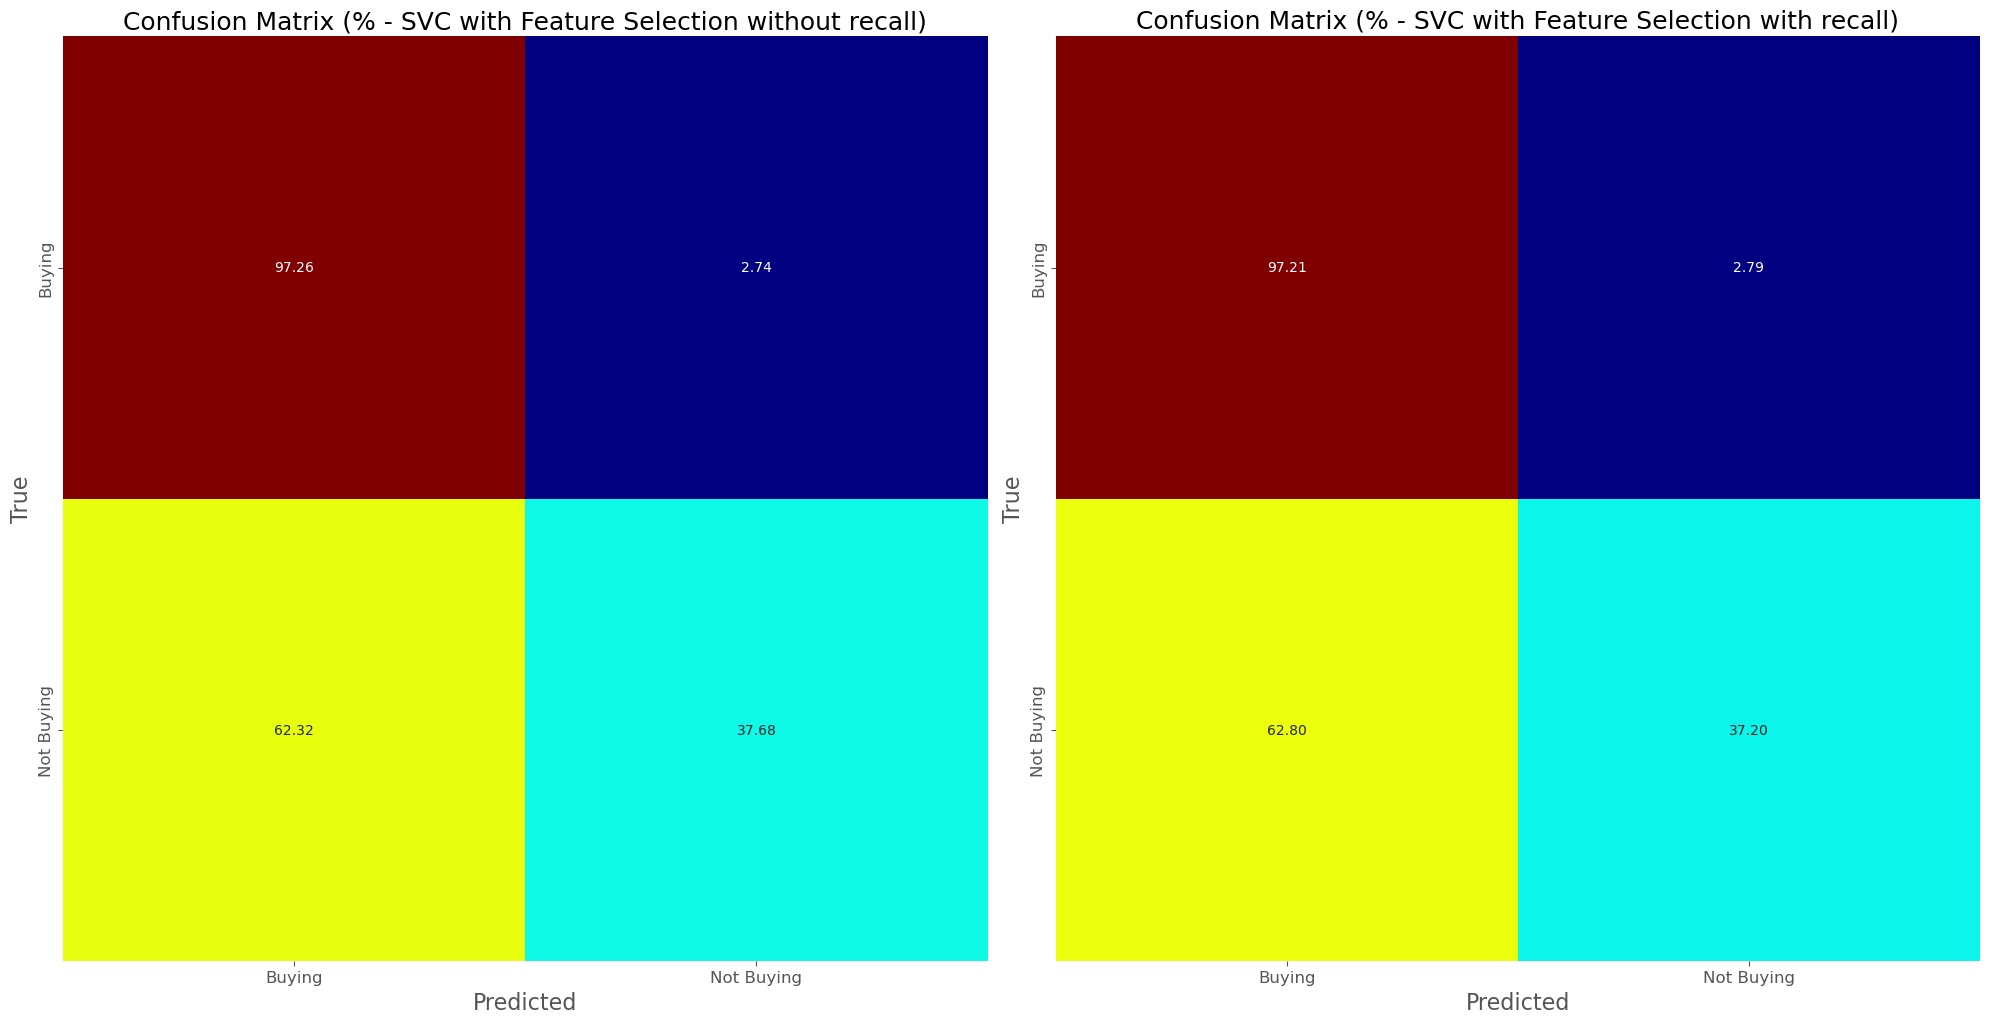

In [258]:
# Compute the confusion matrix for the first model (without recall)
cm_withoutRecall = confusion_matrix(y_test, svc_pred_withFeaturewithoutRecall)

# Normalize the confusion matrix to percentages (row-wise normalization)
cm_percent_withoutRecall = cm_withoutRecall / cm_withoutRecall.sum(axis=1)[:, np.newaxis] * 100  # Row-wise normalization

# Compute the confusion matrix for the second model (with recall)
cm_withRecall = confusion_matrix(y_test, svc_pred_withFeaturewithRecall)

# Normalize the confusion matrix to percentages (row-wise normalization)
cm_percent_withRecall = cm_withRecall / cm_withRecall.sum(axis=1)[:, np.newaxis] * 100  # Row-wise normalization

# Plot both confusion matrices side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Create a figure with 1 row and 2 columns

# Plot confusion matrix for the model without recall
sns.heatmap(cm_percent_withoutRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=16) # Label for x-axis (Predicted class)
axes[0].set_ylabel('True', fontsize=16) # Label for y-axis (True class)
axes[0].set_title('Confusion Matrix (% - SVC with Feature Selection without recall)', fontsize=18) # Title of the plot
axes[0].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Labels for x-axis ticks
axes[0].set_yticklabels(['Buying', 'Not Buying'], fontsize=12)  # Labels for y-axis ticks

# Plot confusion matrix for the model with recall optimization
sns.heatmap(cm_percent_withRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=16) # Label for x-axis (Predicted class)
axes[1].set_ylabel('True', fontsize=16) # Label for y-axis (True class)
axes[1].set_title('Confusion Matrix (% - SVC with Feature Selection with recall)', fontsize=18) # Title of the plot
axes[1].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Labels for x-axis ticks
axes[1].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Labels for y-axis ticks

# Adjust layout to avoid overlap of labels and titles
plt.tight_layout()
plt.show() # Display the plots

General Insights:
- False Positives (FP): 2.79% of sessions that did not result in a sale were incorrectly predicted as revenue-positive.
- False Negatives (FN): 62.32% of sessions that resulted in revenue were missed and incorrectly predicted as no-revenue sessions.
- Recall Impact: Adding recall slightly reduces False Negatives (63.32% → 62.80%) but also slightly reduces True Positives (37.68% → 37.20%). The overall impact of recall is minimal in this case.

## SVM

### SVM without Feature Selection without Recall

In [262]:
# Define a pipeline with feature selection and SVM classification
svm_pipeline = make_pipeline(
    transformer, # Data transformation step (e.g., scaling or encoding)
    SelectKBest(score_func=f_classif, k=10),  # Feature selection step to select top 10 features based on ANOVA F-statistic
    SVC(kernel='rbf') # SVM classifier with radial basis function (RBF) kernel
)

In [263]:
# Define a parameter grid for GridSearchCV to tune hyperparameters
param_grid = {
        'selectkbest__k': [5],  # Feature selection step: Set the number of top features to 5
        'svc__C': np.logspace(-1, 1, 2) , # SVM hyperparameter: Regularization parameter 'C' (log-spaced values between 0.1 and 10)
         'svc__gamma': ['auto', 'scale'] # SVM hyperparameter: Kernel coefficient 'gamma' (either 'auto' or 'scale')
}

In [264]:
# Initialize and fit GridSearchCV with the SVM pipeline and the defined parameter grid
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=kfold, verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'S...
                                                                          'Browser',
                                                                          'Region',
                                                                          'TrafficType',
                                                                          'Weekend']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Month',
                                                                          'VisitorType'])])),
                                       ('selectkbest', SelectKBest()),
                                       ('svc', SVC())]),
             n_jobs=4,
             param_grid={'selectkbest__k': [5], 'svc__C': array([ 0.1, 10. ]),
                         'svc__gamma': ['auto', 'scale']},
             verbose=1)

In [265]:
# Retrieve the best estimator (model) after performing GridSearchCV and print the best parameters found
best_svm_withoutFeatureRecall = grid_search.best_estimator_
print("Best SVM Parameters:", grid_search.best_params_)

Best SVM Parameters: {'selectkbest__k': 5, 'svc__C': 10.0, 'svc__gamma': 'auto'}


In [266]:
# Use the best model to make predictions on the test set
svm_pred_withoutFeatureRecall = best_svm_withoutFeatureRecall.predict(X_test)
# Calculate evaluation metrics for the predictions: accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, svm_pred_withoutFeatureRecall) * 100
recall = recall_score(y_test, svm_pred_withoutFeatureRecall) * 100
precision = precision_score(y_test, svm_pred_withoutFeatureRecall) * 100
f1 = f1_score(y_test, svm_pred_withoutFeatureRecall) * 100

# Store the calculated metrics in a DataFrame for easy comparison and analysis
svm_withoutFeatures_withoutRecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Value': [accuracy, recall, precision, f1]
})

### SVM without Feature Selection With recall

In [268]:
# Define a pipeline that includes feature selection and SVM classification
svm_pipeline = make_pipeline(
    transformer, # Apply the pre-defined transformer for preprocessing (e.g., scaling, encoding)
    SelectKBest(score_func=f_classif, k=10),  # Select top 10 features using the ANOVA F-value (f_classif)
    SVC(kernel='rbf') # Support Vector Classifier with RBF (Radial Basis Function) kernel for classification
)

In [269]:
# Define GridSearchCV to tune hyperparameters
param_grid = {
        'selectkbest__k': [5],  # Set the number of top features to select (k=5) during feature selection
        'svc__C': np.logspace(-1, 1, 2), # Hyperparameter 'C' for SVC (Regularization parameter), trying values 0.1 and 1
        'svc__gamma': ['auto', 'scale'] # Hyperparameter 'gamma' for SVC (Kernel coefficient), trying 'auto' and 'scale' values
}

In [270]:
# We perform GridSearchCV with cross-validation to find the best hyperparameters for the pipeline
# We use k-fold cross-validation to evaluate the model
# Display progress and information during the search
# Optimize the model for recall (sensitivity)
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=kfold, verbose=1, n_jobs=4, scoring='recall')

# Fit the GridSearchCV on the training data to find the best parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'S...
                                                                          'TrafficType',
                                                                          'Weekend']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Month',
                                                                          'VisitorType'])])),
                                       ('selectkbest', SelectKBest()),
                                       ('svc', SVC())]),
             n_jobs=4,
             param_grid={'selectkbest__k': [5], 'svc__C': array([ 0.1, 10. ]),
                         'svc__gamma': ['auto', 'scale']},
             scoring='recall', verbose=1)

In [271]:
# Get the best model after performing GridSearchCV
best_svm_withoutFeaturewithRecall = grid_search.best_estimator_

# Print the best hyperparameters that were found by GridSearchCV
print("Best SVM Parameters:", grid_search.best_params_)

Best SVM Parameters: {'selectkbest__k': 5, 'svc__C': 10.0, 'svc__gamma': 'auto'}


In [272]:
# Make predictions using the best model obtained from GridSearchCV
svm_pred_withoutFeaturewithRecall = best_svm_withoutFeaturewithRecall.predict(X_test)

# Calculate evaluation metrics (accuracy, recall, precision, F1 score) for the model
accuracy = accuracy_score(y_test, svm_pred_withoutFeaturewithRecall) * 100
recall = recall_score(y_test, svm_pred_withoutFeaturewithRecall) * 100
precision = precision_score(y_test, svm_pred_withoutFeaturewithRecall) * 100
f1 = f1_score(y_test, svm_pred_withoutFeaturewithRecall) * 100

# Store the evaluation metrics in a DataFrame for easy display
svm_withoutFeatures_withRecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Value': [accuracy, recall, precision, f1]
})

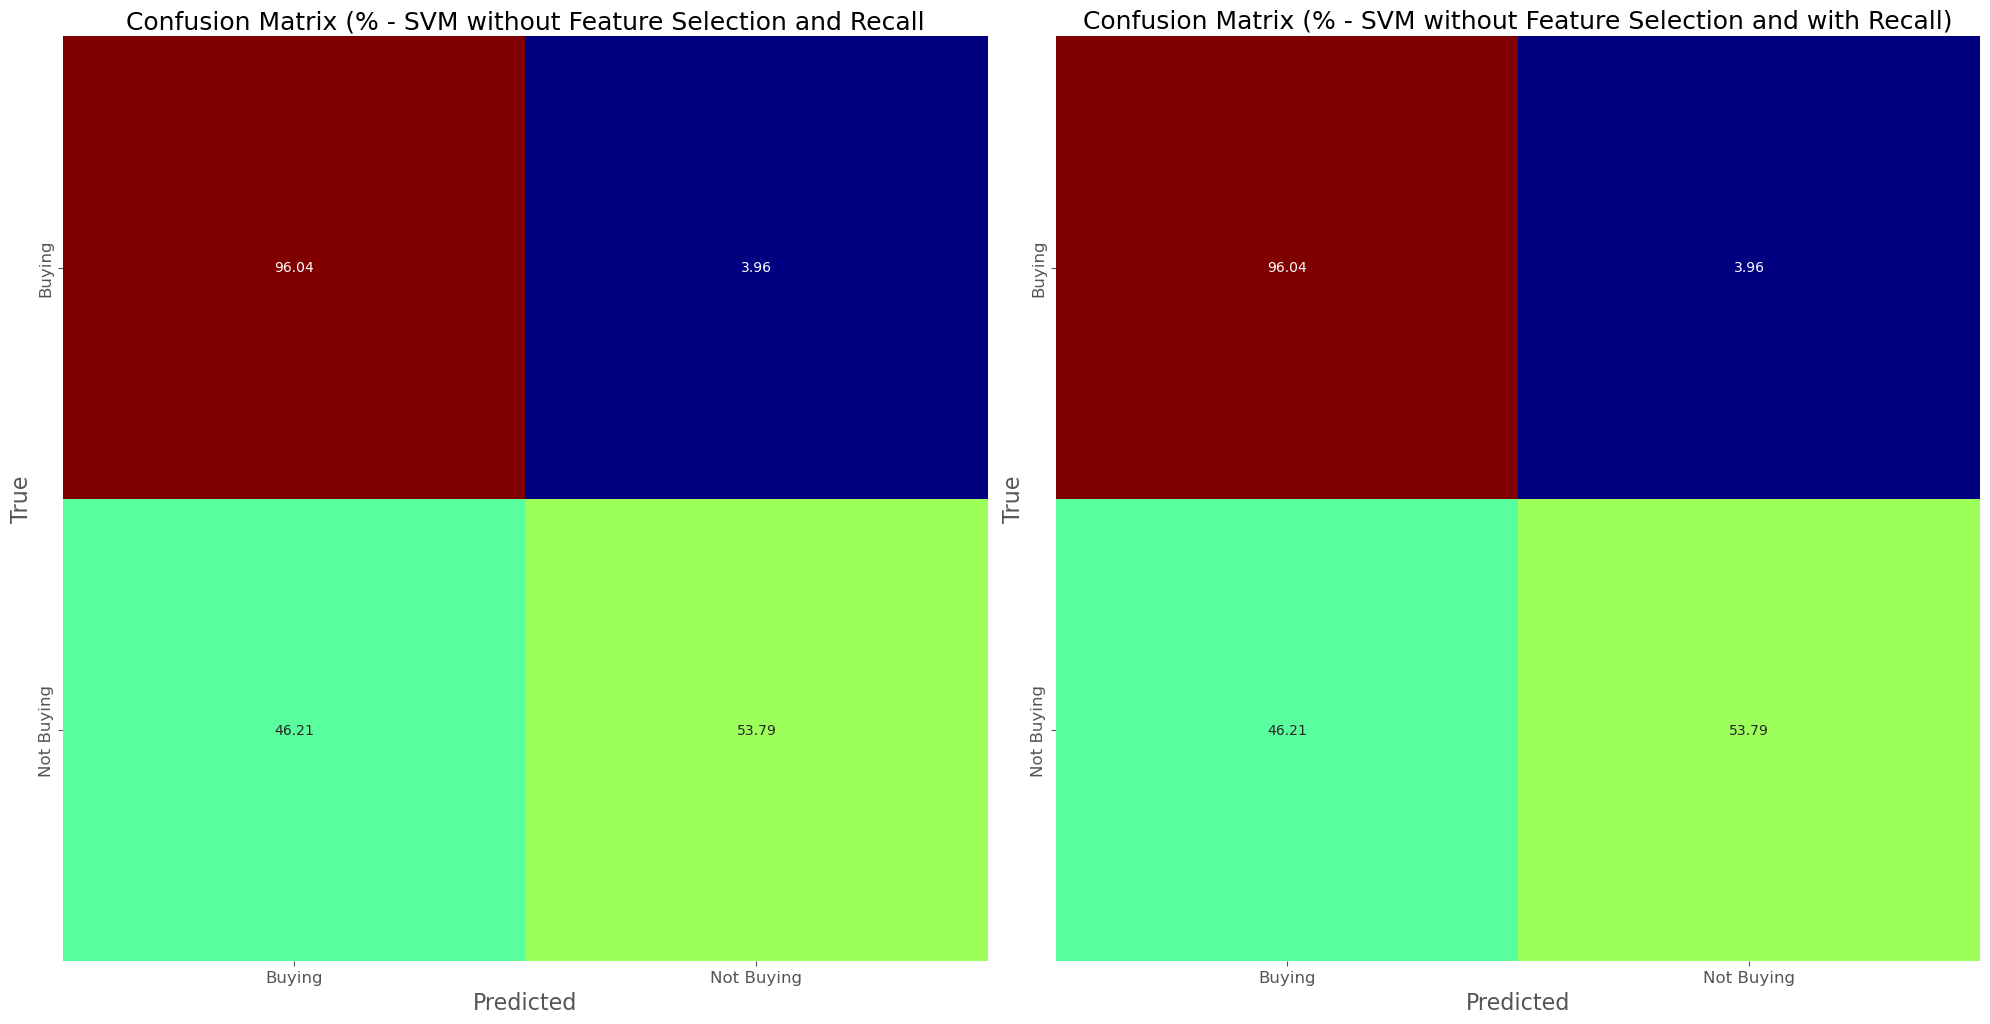

In [273]:
# Compute and normalize the confusion matrix for the first model (without recall)
cm_withoutRecall = confusion_matrix(y_test, svm_pred_withoutFeatureRecall)
cm_percent_withoutRecall = cm_withoutRecall / cm_withoutRecall.sum(axis=1)[:, np.newaxis] * 100

# Compute and normalize the confusion matrix for the second model (with recall)
cm_withRecall = confusion_matrix(y_test, svm_pred_withoutFeaturewithRecall)
cm_percent_withRecall = cm_withRecall / cm_withRecall.sum(axis=1)[:, np.newaxis] * 100

# Create a subplot to visualize both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Plot confusion matrix for the first model (without recall)
sns.heatmap(cm_percent_withoutRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=16) # Label x-axis
axes[0].set_ylabel('True', fontsize=16) # Label y-axis
axes[0].set_title('Confusion Matrix (% - SVM without Feature Selection and Recall', fontsize=18) # Title for the plot
axes[0].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Set x-tick labels
axes[0].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Set y-tick labels

# Plot confusion matrix for the second model (with recall)
sns.heatmap(cm_percent_withRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=16) # Label x-axis
axes[1].set_ylabel('True', fontsize=16) # Label y-axis
axes[1].set_title('Confusion Matrix (% - SVM without Feature Selection and with Recall)', fontsize=18) # Title for the plot
axes[1].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Set x-tick labels
axes[1].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Set y-tick labels

# Adjust layout to ensure the plots fit well
plt.tight_layout()
# Display the plots
plt.show()

General Insights:
- False Positives (FP): 3.96% of sessions that did not result in a sale were incorrectly predicted as revenue-positive.
- False Negatives (FN): 46.21% of sessions that resulted in revenue were missed and incorrectly predicted as no-revenue sessions.
- Recall Impact: Adding recall did not affect the model's performance, suggesting that the recall adjustment had no impact on the predictions.

In [275]:
# This is the DataFrame that contains the performance metrics for the SVM model without feature selection and without recall optimization.
svm_withoutFeatures_withoutRecall

Metric      Value
0   Accuracy  88.807786
1     Recall  53.791469
2  Precision  73.701299
3   F1 Score  62.191781

In [276]:
# This is the DataFrame that contains the performance metrics for the SVM model without feature selection and with recall optimization.
svm_withoutFeatures_withRecall

Metric      Value
0   Accuracy  88.807786
1     Recall  53.791469
2  Precision  73.701299
3   F1 Score  62.191781

### SVM with Feature Selection without Recall - Forward Feature Selection

In [278]:
X_train_transformed = transformer.fit_transform(X_train)

In [279]:
numerical_features = numericals
categorical_features = transformer.named_transformers_['categorical'].named_steps['onehotencoder'].get_feature_names_out(categoricals)
all_features = numerical_features + categorical_features.tolist()

In [280]:
class Solution:
    features = list() # Initialize an empty list to hold selected features
    accuracy = 0.0 # Initialize accuracy to 0
    
    def __init__(self, y):
        # Initialize the Solution object with the true target values 'y'
        pred = [y.mode()[0]] * len(y) # Generate a prediction where all predictions are the mode of 'y'
        self.accuracy = accuracy_score(y, pred) # Set accuracy to the score of this naive prediction
    
    def update(self, features, accuracy):
        # Update the best features and accuracy if the new accuracy is higher
        if accuracy > self.accuracy:
            self.features = features # Update the selected features list
            self.accuracy = accuracy # Update the accuracy with the new value
            return True
        return False # If the new accuracy is not better, return False

def evaluate_feature(feature, current_features, X_train_transformed, y_train, all_features, kfold):
    # Add a new feature to the current list of features and evaluate its performance
    new_features = current_features + [feature] # Add the new feature to the current list of selected features
    feature_indices = [all_features.index(f) for f in new_features] # Get the indices of the selected features
    X_subset = X_train_transformed[:, feature_indices] # Subset the training data using the selected features
    
    model = SVC(kernel='rbf') # Initialize the SVC model with an RBF kernel
    accuracies = cross_val_score(estimator=model, X=X_subset, y=y_train, cv=kfold, scoring='accuracy') # Cross-validate to compute the accuracy
    return feature, np.average(accuracies) # Return the feature and its average accuracy across cross-validation folds

def forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=-1):
    current_features = [] # Initialize an empty list for the currently selected features
    best = Solution(y_train) # Initialize a Solution object to track the best features and accuracy
    
    while len(current_features) < len(all_features): # Iterate until all features have been considered
        remaining_features = set(all_features) - set(current_features) # Get the remaining unselected features

        # Parallelize the evaluation of each remaining feature
        results = Parallel(n_jobs=n_jobs)(
            delayed(evaluate_feature)(feature, current_features, X_train_transformed, y_train, all_features, kfold)
            for feature in remaining_features
        )

        # Select the feature with the highest accuracy
        selected_feature, best_accuracy = max(results, key=lambda x: x[1])

        # If the new accuracy is better, update the best feature set and accuracy
        if best.update(current_features + [selected_feature], best_accuracy):
            current_features.append(selected_feature) # Add the selected feature to the current features
        else:
            break # Stop if no improvement in accuracy
    
    return best, best.features, best.accuracy  # Return the best object (with selected features and accuracy)

In [281]:
# Run forward feature selection to find the best set of features based on the accuracy
# Arguments:
# X_train_transformed: Transformed training data with all features
# y_train: The training labels
# all_features: List of all feature names
# kfold: K-fold cross-validation strategy to evaluate the model performance
# n_jobs=4: Number of CPU cores to use for parallel processing, speeding up the computation
best, best_features, best_accuracy = forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=4)
# Print the selected best features that achieved the highest accuracy
print("Best features of SVM:", best_features)
# Print the best accuracy achieved by the model using the selected features
print("Best accuracy of SVM:", best_accuracy)

Best features of SVM: ['PageValues', 'Administrative', 'ExitRates', 'Month_Jul', 'Month_Mar', 'Month_June']
Best accuracy of SVM: 0.900749879971913


The SVM model achieved an accuracy of **90.07%**, with the best features being **PageValues**, **Administrative**, **ExitRates**, and the months **March**, **July**, and **June**.

In [283]:
# Extract indices of the best features selected from the 'best' object
# best.features contains the names of the best features, and we need to map them to the corresponding indices
best_feature_indices = [all_features.index(f) for f in best.features]
# Select the subset of the training data containing only the best features
# X_train_transformed contains the transformed training data, and we select the columns corresponding to best_feature_indices
X_train_best = X_train_transformed[:, best_feature_indices]
# Transform the test data using the same transformer used on the training data
X_test_transformed = transformer.transform(X_test)
# Select the subset of the test data containing only the best features
X_test_best = X_test_transformed[:, best_feature_indices]

In [284]:
# Train the final model with GridSearchCV
svm_withFeaturewithoutRecall = GridSearchCV(
    estimator=SVC(kernel='rbf'), # Support Vector Classifier with RBF kernel
    param_grid={
         'C': np.logspace(-1, 1, 2) # Grid of hyperparameters for C (regularization parameter)
    },
    verbose=True, # Print detailed output during training process; set to False to suppress output
    n_jobs=4, # Number of CPU cores to use for parallel processing
    cv=kfold # Cross-validation strategy (k-fold)
)
# Fit the model using the best features selected previously
svm_withFeaturewithoutRecall.fit(X_train_best, y_train) # Train SVM on the transformed training data with selected features

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=4, param_grid={'C': array([ 0.1, 10. ])},
             verbose=True)

In [285]:
# Make predictions using the trained SVM model with the selected features
svm_pred_withFeaturewithoutRecall= svm_withFeaturewithoutRecall.predict(X_test_best) # Predict target labels for the test set using the model

In [286]:
# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, svm_pred_withFeaturewithoutRecall) * 100 # Calculate the accuracy of the predictions
recall = recall_score(y_test, svm_pred_withFeaturewithoutRecall) * 100 # Calculate recall (sensitivity) for the predictions
precision = precision_score(y_test, svm_pred_withFeaturewithoutRecall) * 100 # Calculate precision for the predictions
f1 = f1_score(y_test, svm_pred_withFeaturewithoutRecall) * 100 # Calculate the F1 score for the predictions

# Store all metrics in a DataFrame for easy visualization and analysis
svm_withFeaturewithoutRecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'], # List of metrics
    'Value': [accuracy, recall, precision, f1] # Corresponding values for each metric
})

### SVM with Feature Selection with Recall - Forward Feature Selection

In [288]:
# Class to track best feature set based on accuracy and recall
class Solution:
    features = list() # Stores the best feature set
    accuracy = 0.0 # Stores the best accuracy
    recall = 0.0  # Stores the best recall value
    
    def __init__(self, y):
        # Initialize the class with the mode of y (most frequent class)
        pred = [y.mode()[0]] * len(y) # Predict the most frequent class for all samples
        self.accuracy = accuracy_score(y, pred) # Initialize accuracy (simple baseline)
        self.recall = recall_score(y, pred)  # Initialize recall (simple baseline)
    
    def update(self, features, accuracy, recall):
        # Update the solution if recall improves (prioritize recall, then accuracy)
        if recall > self.recall or (recall == self.recall and accuracy > self.accuracy):
            self.features = features # Store the new best feature set
            self.accuracy = accuracy # Update best accuracy
            self.recall = recall # Update best recall
            return True
        return False
        
# Function to evaluate a feature's performance using cross-validation
def evaluate_feature(feature, current_features, X_train_transformed, y_train, all_features, kfold):
    new_features = current_features + [feature] # Add the feature to the current set
    feature_indices = [all_features.index(f) for f in new_features] # Get indices of features in the feature set
    X_subset = X_train_transformed[:, feature_indices] # Subset of X_train using the selected features
    
    model = SVC(kernel='rbf') # Initialize the SVM classifier
    
    # Evaluate accuracy using cross-validation
    accuracies = cross_val_score(estimator=model, X=X_subset, y=y_train, cv=kfold, scoring='accuracy')
    accuracy = np.average(accuracies) # Average accuracy
    
    # Evaluate recall using cross-validation
    recalls = cross_val_score(estimator=model, X=X_subset, y=y_train, cv=kfold, scoring='recall')
    recall = np.average(recalls) # Average recall
    
    return feature, accuracy, recall # Return the feature, its accuracy, and its recall

# Forward feature selection method to find the best feature set based on accuracy and recall
def forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=-1):
    current_features = [] # Start with an empty set of features
    best = Solution(y_train) # Create a Solution object to track the best features, accuracy, and recall
    
    while len(current_features) < len(all_features):
        remaining_features = set(all_features) - set(current_features) # Features not yet selected
        
        # Evaluate all remaining features in parallel (using multiple processors)
        results = Parallel(n_jobs=n_jobs)(
            delayed(evaluate_feature)(feature, current_features, X_train_transformed, y_train, all_features, kfold)
            for feature in remaining_features
        )
        
        # Select the feature that maximizes recall (and accuracy as a tiebreaker)
        selected_feature, best_accuracy, best_recall = max(results, key=lambda x: (x[2], x[1]))  # Prioritize recall, then accuracy
        
        # Update the solution with the best feature
        if best.update(current_features + [selected_feature], best_accuracy, best_recall):
            current_features.append(selected_feature) # Add the selected feature to the set
        else:
            break # Stop if no improvement
    
    return best.features, best.accuracy, best.recall # Return the best feature set, accuracy, and recall

# Usage: Run the feature selection and print the best features
best_features, best_accuracy, best_recall = forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=4)
print("Best features of svm with recall:", best_features) # Display the best features
#print("Best accuracy:", best_accuracy)
#print("Best recall:", best_recall)

Best features of svm with recall: ['PageValues', 'Month_Nov', 'Month_Mar', 'Month_Jul', 'Month_June', 'Month_Aug', 'Month_Sep', 'VisitorType_Other']


The best features of the SVM model with recall are **PageValues**, **Month_Nov**, **Month_Mar**, **Month_Jul**, **Month_June**, **Month_Aug**, **Month_Sep**, and **VisitorType_Other**.

In [290]:
# Train the final model with the best features and GridSearchCV
# Step 1: Get the indices of the best selected features from the list of all features
best_feature_indices = [all_features.index(f) for f in best.features]
# Explanation: `best.features` contains the best features selected during forward feature selection.
# We get the indices of these features in the full list `all_features` to create a subset for training and testing.

# Step 2: Create a subset of the training data using the best selected features
X_train_best = X_train_transformed[:, best_feature_indices]
# Explanation: We use the indices of the best features to select the corresponding columns from `X_train_transformed`.
# This ensures that only the selected features are used to train the model.

# Step 3: Transform the test data using the same transformer (preprocessing)
X_test_transformed = transformer.transform(X_test)
# Explanation: We apply the same transformation to the test data as was applied to the training data.
# This ensures that the test data is processed in the same way as the training data, including scaling, encoding, etc.

# Step 4: Create a subset of the transformed test data using the best selected features
X_test_best = X_test_transformed[:, best_feature_indices]
# Explanation: Similar to the training data, we select only the best features from the transformed test data.

In [291]:
# Train the final model with GridSearchCV using the best features and optimizing for recall
# Step 1: Create a GridSearchCV object for hyperparameter tuning
svm_withFeaturewithRecall = GridSearchCV(
    estimator=SVC(kernel='rbf'), # Use Support Vector Machine with RBF kernel as the estimator
    param_grid={
          'C': np.logspace(-1, 1, 2) # Define a grid of hyperparameters for C (penalty parameter)
        # np.logspace(-1, 1, 2) creates a list [0.1, 1.0], which are values of C to be tested in the grid search
    },
    verbose=True, # Set to True to print detailed output during the grid search
    cv=kfold, # Specify the k-fold cross-validation strategy
    scoring='recall',  # Optimize for recall (rather than accuracy) during model evaluation
    n_jobs=4 # Use 4 CPU cores to perform the grid search in parallel (faster execution)
)

# Step 2: Fit the model on the training data with the best features
svm_withFeaturewithRecall.fit(X_train_best, y_train)
# Explanation: Fit the SVM model with the best selected features and perform cross-validation to find the best hyperparameter for C.

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=4, param_grid={'C': array([ 0.1, 10. ])},
             scoring='recall', verbose=True)

In [292]:
# Train the final model with the best features selected by forward feature selection and perform hyperparameter tuning using GridSearchCV
# Step 1: Select the indices of the best features in the transformed training data
best_feature_indices = [all_features.index(f) for f in best_features] # Get the indices of best selected features
X_train_best = X_train_transformed[:, best_feature_indices] # Subset the training data to only include the best features

# Step 2: Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': np.logspace(-1, 1, 2), # Grid for hyperparameter C (penalty term), testing values 0.1 and 1.0
    'gamma': np.logspace(-3, 2, 5) # Grid for gamma, testing values from 0.001 to 100
}

# Step 3: Create a GridSearchCV object with an SVM model and the defined hyperparameter grid
grid_search = GridSearchCV(
    estimator=SVC(kernel='rbf'), # Use Support Vector Machine with RBF kernel
    param_grid=param_grid, # Specify the parameter grid for tuning
    cv=kfold, # Use k-fold cross-validation for model evaluation
    scoring='recall', # Optimize the model for recall (importance of identifying true positives)
    n_jobs=4 # Use 4 CPU cores for parallel processing of cross-validation
)
# Step 4: Fit the GridSearchCV model on the training data with the best features
grid_search.fit(X_train_best, y_train)

# Step 5: Transform the test data using the transformer and select the best features
X_test_transformed = transformer.transform(X_test)  # Apply the same transformation to the test data
X_test_best = X_test_transformed[:, best_feature_indices] # Subset the test data to include only the best features

# Step 6: Make predictions on the test set using the best model from GridSearchCV
svm_pred_withFeaturewithRecall = grid_search.predict(X_test_best)

# Step 7: Calculate and print performance metrics (accuracy and recall) for the test set
test_accuracy = accuracy_score(y_test, svm_pred_withFeaturewithRecall) # Calculate accuracy of predictions
test_recall = recall_score(y_test, svm_pred_withFeaturewithRecall) # Calculate recall of predictions

# Step 8: Print the results
print("Test accuracy:", test_accuracy)
print("Test recall:", test_recall)

# Step 9: Print the best hyperparameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

Test accuracy: 0.8844282238442822
Test recall: 0.7085308056872038
Best parameters: {'C': 0.1, 'gamma': 100.0}


The model achieved a test accuracy of **88.44%** and a recall of **70.85%**, with the best parameters being **C = 0.1** and **gamma = 100.0**.

In [294]:
# Step 1: Calculate evaluation metrics based on the model predictions on the test set
# Accuracy: Proportion of correct predictions (both True Positives and True Negatives)
accuracy = accuracy_score(y_test, svm_pred_withFeaturewithRecall) * 100 # Multiply by 100 to express as percentage
# Recall: Proportion of actual positives correctly identified by the model
recall = recall_score(y_test, svm_pred_withFeaturewithRecall) * 100 # Multiply by 100 to express as percentage
# Precision: Proportion of positive predictions that are actually positive
precision = precision_score(y_test, svm_pred_withFeaturewithRecall) * 100 # Multiply by 100 to express as percentage
# F1 Score: Harmonic mean of precision and recall, used when we need a balance between them
f1 = f1_score(y_test, svm_pred_withFeaturewithRecall) * 100 # Multiply by 100 to express as percentage

# Step 2: Store the calculated metrics in a DataFrame for easy display and comparison
svm_withFeaturewithRecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'], # Names of the metrics
    'Value': [accuracy, recall, precision, f1] # Corresponding values for each metric
})

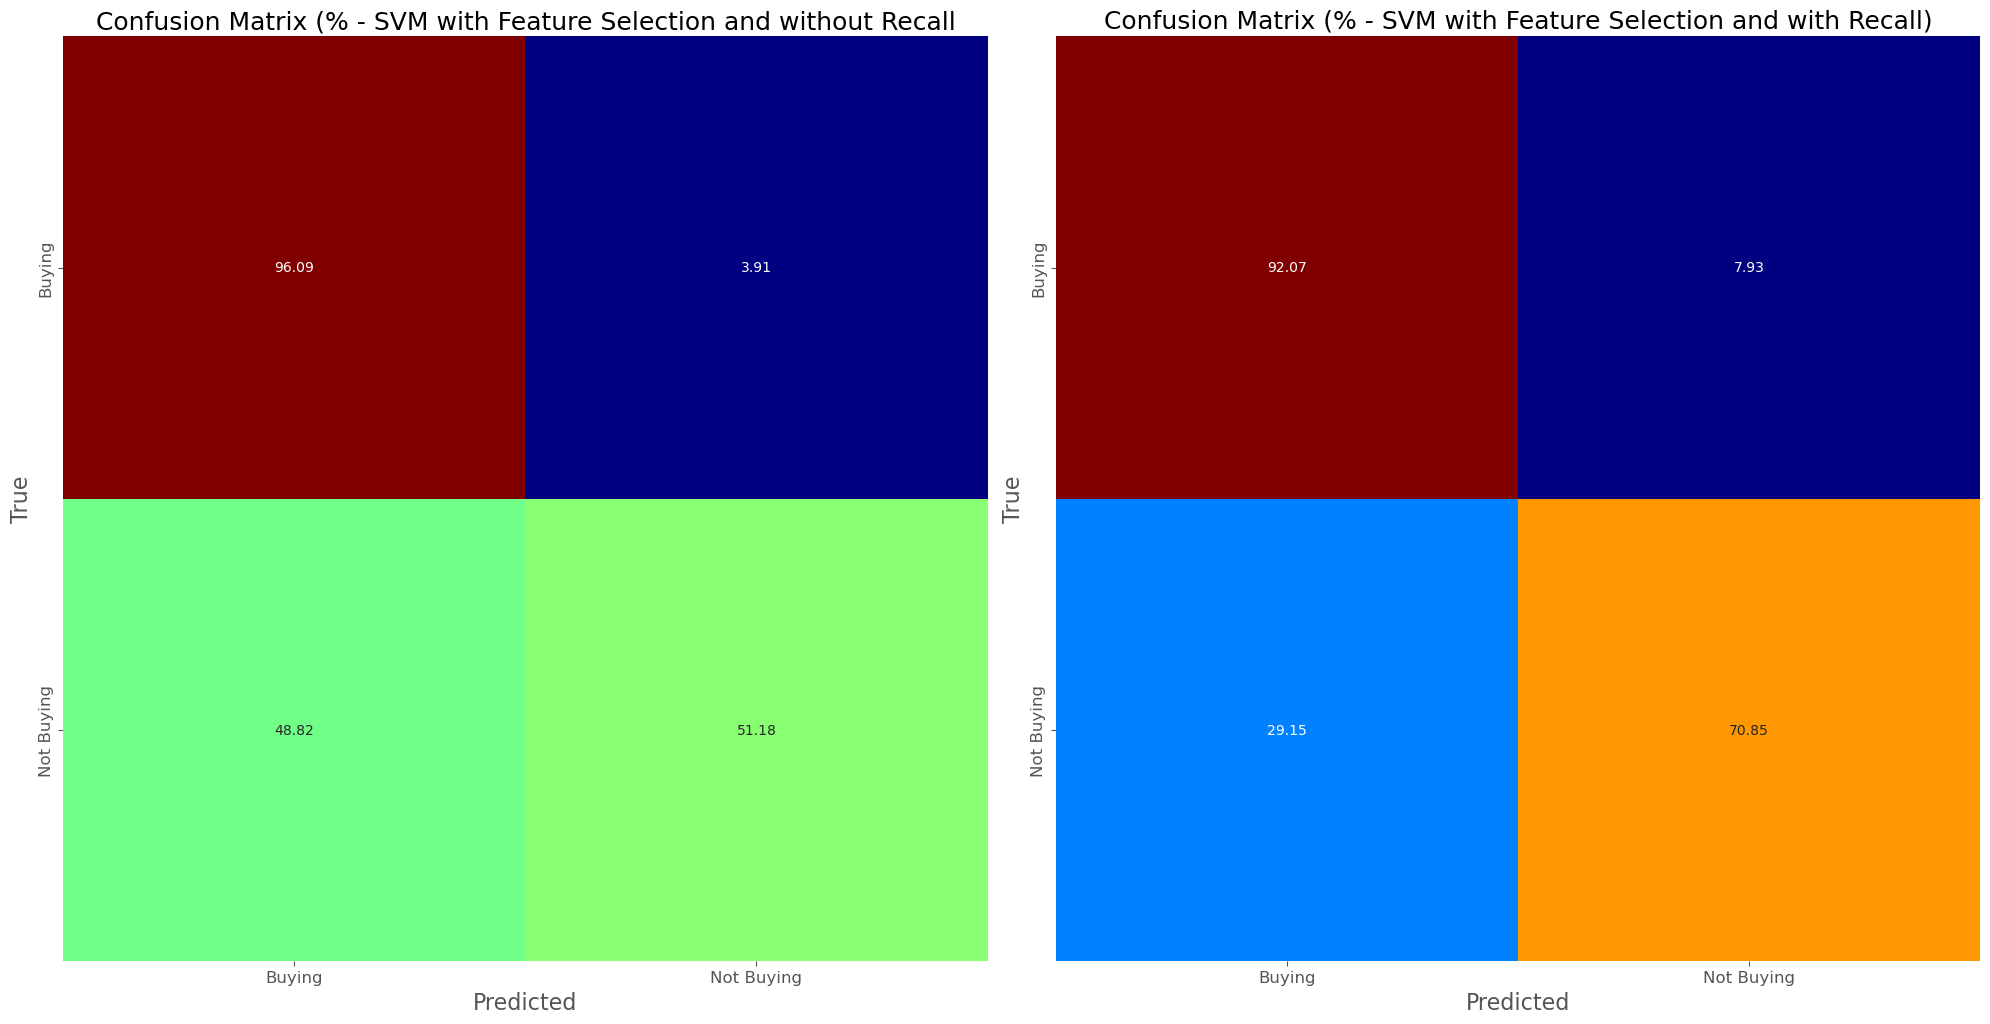

In [295]:
# Compute and normalize confusion matrix for the first model (with feature selection but without recall optimization)
cm_withoutRecall = confusion_matrix(y_test, svm_pred_withFeaturewithoutRecall)  # Compute confusion matrix
cm_percent_withoutRecall = cm_withoutRecall / cm_withoutRecall.sum(axis=1)[:, np.newaxis] * 100 # Normalize to percentage

# Compute and normalize confusion matrix for the second model (with recall optimization)
cm_withRecall = confusion_matrix(y_test, svm_pred_withFeaturewithRecall) # Compute confusion matrix
cm_percent_withRecall = cm_withRecall / cm_withRecall.sum(axis=1)[:, np.newaxis] * 100 # Normalize to percentage

# Plot both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))   # Create a figure with 1 row and 2 columns for plotting

# Plot confusion matrix for the first model (with feature selection but without recall optimization)
sns.heatmap(cm_percent_withoutRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[0])
# Plot confusion matrix with annotations, formatting as percentage with two decimal points
axes[0].set_xlabel('Predicted', fontsize=16) # X-axis label
axes[0].set_ylabel('True', fontsize=16) # Y-axis label
axes[0].set_title('Confusion Matrix (% - SVM with Feature Selection and without Recall', fontsize=18)  # Title for first plot
axes[0].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Set labels for X-axis ticks
axes[0].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Set labels for Y-axis ticks

# Plot confusion matrix for the second model (with recall optimization)
sns.heatmap(cm_percent_withRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[1])
# Plot confusion matrix with annotations, formatting as percentage with two decimal points
axes[1].set_xlabel('Predicted', fontsize=16)  # X-axis label
axes[1].set_ylabel('True', fontsize=16) # Y-axis label
axes[1].set_title('Confusion Matrix (% - SVM with Feature Selection and with Recall)', fontsize=18) # Title for second plot
axes[1].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Set labels for X-axis ticks
axes[1].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Set labels for Y-axis ticks

plt.tight_layout() # Ensure the plots fit within the figure area
plt.show() # Display the plots

General Insights:
- Feature Selection: Improves the model's balance by enhancing the detection of "Not Buying" cases while maintaining high accuracy for "Buying" predictions.
- Impact of Recall: Prioritizing recall reduces False Negatives (48.82% → 29.15%), boosting detection of "Not Buying." Though False Positives slightly increase (3.91% → 7.93%), this trade-off improves overall model robustness.
- Conclusion: The model demonstrates strong performance, offering a balanced approach between precision and recall, making it reliable for real-world predictions.


In [297]:
# This is the DataFrame that contains the performance metrics for the SVC model with feature selection and without recall optimization.
svm_withFeaturewithoutRecall

Metric      Value
0   Accuracy  88.402271
1     Recall  51.184834
2  Precision  72.972973
3   F1 Score  60.167131

In [298]:
# This is the DataFrame that contains the performance metrics for the SVC model with feature selection and with recall optimization.
svm_withFeaturewithRecall

Metric      Value
0   Accuracy  88.442822
1     Recall  70.853081
2  Precision  64.859002
3   F1 Score  67.723669

## Logistic Regression

###  Logistic Regression without Feature Selection without Recall

In [301]:
# 'Log_withoutfeaturewithoutrecall' is a pipeline that:
# 1. Applies data transformations using 'transformer' (e.g., scaling or encoding).
# 2. Performs GridSearchCV to tune the hyperparameter 'C' for the Logistic Regression model with 'liblinear' solver.
#    - 'param_grid' defines the range of values for 'C' to test (logarithmic scale from 10^-1 to 10^1).
#    - 'verbose=True' outputs detailed progress logs.
#    - 'n_jobs=4' allows parallel computation to speed up the grid search.
#    - 'cv=kfold' specifies k-fold cross-validation for model evaluation.
Log_withoutfeaturewithoutrecall = make_pipeline(
    transformer,
    GridSearchCV(
        estimator=LogisticRegression(solver='liblinear'),
        param_grid={'C': np.logspace(-1, 1, 2),},
        verbose=True,
        n_jobs=4,
        cv=kfold
    )
)

In [302]:
# Fits the 'Log_withoutfeaturewithoutrecall' pipeline to the training data (X_train, y_train).
Log_withoutfeaturewithoutrecall.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'Weekend']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Month', 'VisitorType'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                              estimator=LogisticRegression(solver='liblinear'),
                              n_jobs=4, param_grid={'C': array([ 0.1, 10. ])},
                              verbose=True))])

In [303]:
# Extracts the best Logistic Regression model (best_estimator_) from the GridSearchCV results.
# It is stored in 'best_log_reg' for further use. The best hyperparameters found during the grid search are then printed.
best_log_reg = Log_withoutfeaturewithoutrecall[-1].best_estimator_
print("Best Logistic Regression Parameters:", Log_withoutfeaturewithoutrecall[-1].best_params_)

Best Logistic Regression Parameters: {'C': 10.0}


In [304]:
# Makes predictions using the best Logistic Regression model ('Log_withoutfeaturewithoutrecall') 
# on the test dataset ('X_test'). The predicted values are stored in 'Log_pred_withoutfeaturewithoutrecall'.
Log_pred_withoutfeaturewithoutrecall = Log_withoutfeaturewithoutrecall.predict(X_test)

In [305]:
# Calculate evaluation metrics (Accuracy, Recall, Precision, and F1 Score) for the Logistic Regression model
accuracy = accuracy_score(y_test, Log_pred_withoutfeaturewithoutrecall) * 100
recall = recall_score(y_test, Log_pred_withoutfeaturewithoutrecall) * 100
precision = precision_score(y_test, Log_pred_withoutfeaturewithoutrecall) * 100
f1 = f1_score(y_test, Log_pred_withoutfeaturewithoutrecall) * 100

# Store metrics in a DataFrame
Log_withoutfeaturewithoutrecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Value': [accuracy, recall, precision, f1]
})

In [306]:
# This is the DataFrame that contains the performance metrics for the Logistic model without feature selection and without recall optimization.
Log_withoutfeaturewithoutrecall

Metric      Value
0   Accuracy  87.064071
1     Recall  36.966825
2  Precision  74.641148
3   F1 Score  49.445325

### Logistic Regression without Feature Selection with Recall

In [308]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [309]:
# Define and train the Logistic Regression model with GridSearchCV
Log_withoutfeaturewithrecall = make_pipeline(
    transformer, # Apply the transformer to preprocess data
    GridSearchCV(
        estimator=LogisticRegression(solver='liblinear'),  # Logistic Regression model with 'liblinear' solver
        param_grid={
            'C': np.logspace(-1, 1, 2), # Regularization parameter (searching for values from 0.1 to 10)
        },
        verbose=True,  # Set to True to see progress of grid search
        n_jobs=4, # Use 4 CPU cores for parallelization during grid search
        cv=kfold, # Cross-validation strategy (k-fold)
        scoring='recall'  # We are optimizing the model for recall (prioritize minimizing false negatives)
    )
)

In [310]:
# Fit the model
Log_withoutfeaturewithrecall.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'Weekend']),
                                                 ('categ...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Month', 'VisitorType'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                              estimator=LogisticRegression(solver='liblinear'),
                              n_jobs=4, param_grid={'C': array([ 0.1, 10. ])},
                              scoring='recall', verbose=True))])

In [311]:
# Get the best estimator from GridSearchCV
best_log_reg = Log_withoutfeaturewithrecall[-1].best_estimator_
# Print the best parameters found by GridSearchCV
print("Best Logistic Regression Parameters:", Log_withoutfeaturewithrecall[-1].best_params_)

Best Logistic Regression Parameters: {'C': 10.0}


In [312]:
# Make predictions
Log_pred_withoutfeaturewithrecall = Log_withoutfeaturewithrecall.predict(X_test)

In [313]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, Log_pred_withoutfeaturewithrecall) * 100
# Calculate the recall score
recall = recall_score(y_test, Log_pred_withoutfeaturewithrecall) * 100
# Calculate the precision score
precision = precision_score(y_test, Log_pred_withoutfeaturewithrecall) * 100
# Calculate the F1 score
f1 = f1_score(y_test, Log_pred_withoutfeaturewithrecall) * 100

# Store metrics in a DataFrame for easy viewing
Log_withoutfeaturewithrecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'], # Metrics to evaluate the model
    'Value': [accuracy, recall, precision, f1] # Corresponding values for each metric
})

In [314]:
# This is the DataFrame that contains the performance metrics for the Logistic model without feature selection and with recall optimization.
Log_withoutfeaturewithrecall

Metric      Value
0   Accuracy  87.064071
1     Recall  36.966825
2  Precision  74.641148
3   F1 Score  49.445325

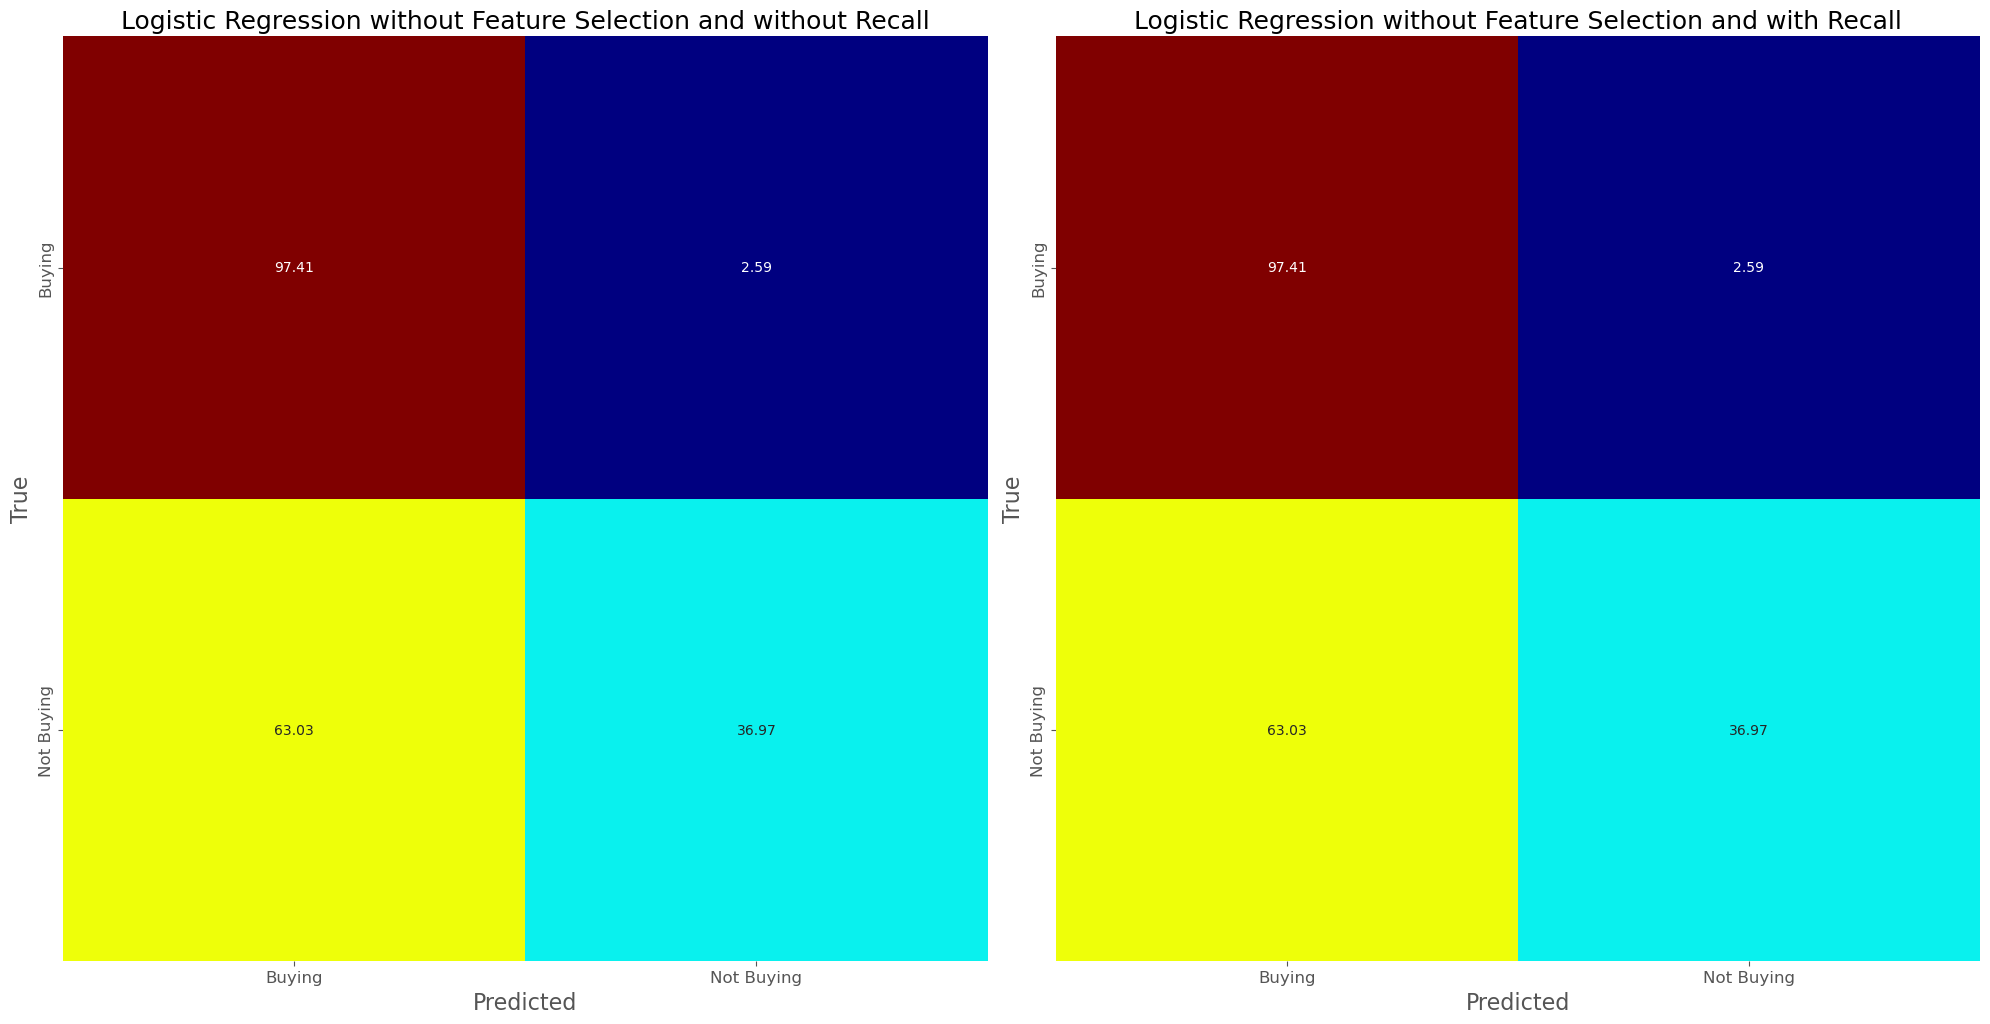

In [315]:
# Compute and normalize confusion matrix for the first model (without recall)
cm_withoutRecall = confusion_matrix(y_test, Log_pred_withoutfeaturewithoutrecall)
cm_percent_withoutRecall = cm_withoutRecall / cm_withoutRecall.sum(axis=1)[:, np.newaxis] * 100

# Compute and normalize confusion matrix for the second model (with recall)
cm_withRecall = confusion_matrix(y_test, Log_pred_withoutfeaturewithrecall)
cm_percent_withRecall = cm_withRecall / cm_withRecall.sum(axis=1)[:, np.newaxis] * 100

# Create a figure with 1 row and 2 columns to plot both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Plot confusion matrix for the first model (without recall)
sns.heatmap(cm_percent_withoutRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=16)  # Label for x-axis
axes[0].set_ylabel('True', fontsize=16) # Label for y-axis
axes[0].set_title('Logistic Regression without Feature Selection and without Recall', fontsize=18) # Title of the plot
axes[0].set_xticklabels(['Buying', 'Not Buying'], fontsize=12) # Labels for x-axis ticks
axes[0].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Labels for y-axis ticks

# Plot confusion matrix for the second model (with recall)
sns.heatmap(cm_percent_withRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=16) # Label for x-axis
axes[1].set_ylabel('True', fontsize=16) # Label for y-axis
axes[1].set_title('Logistic Regression without Feature Selection and with Recall', fontsize=18) # Title of the plot
axes[1].set_xticklabels(['Buying', 'Not Buying'], fontsize=12)  # Labels for x-axis ticks
axes[1].set_yticklabels(['Buying', 'Not Buying'], fontsize=12) # Labels for y-axis ticks

# Adjust layout to prevent overlap and ensure clear presentation
plt.tight_layout()
plt.show()

General Insights:

- False Positives (FP): 2.59% of sessions that did not result in a sale were incorrectly predicted as revenue-positive.
- False Negatives (FN): 63.03% of sessions that resulted in revenue were missed and incorrectly predicted as no-revenue sessions.
- Recall Impact: Adding recall did not affect the model's performance, suggesting that the recall adjustment had no impact on the predictions.

### Logistic regression with Feature Selection without Recall - Forward Feature Selection

In [318]:
# Transform the training data using the pre-defined transformer (e.g., scaling, encoding)
X_train_transformed = transformer.fit_transform(X_train)

In [319]:
# Get the names of all features after transformation
# Store the original numerical feature names
numerical_features = numericals
# Get the transformed categorical feature names from OneHotEncoder in the pipeline
categorical_features = transformer.named_transformers_['categorical'].named_steps['onehotencoder'].get_feature_names_out(categoricals)
# Combine both numerical and categorical feature names into a single list
all_features = numerical_features + categorical_features.tolist()

In [320]:
# Class to track the best feature subset and its corresponding accuracy
class Solution:
    features = list() # List to store the selected features
    accuracy = 0.0 # Accuracy of the selected feature subset
    
    def __init__(self, y):
        # Initialize the Solution with a baseline accuracy (naive classifier predicting the most frequent class)
        pred = [y.mode()[0]] * len(y) # Predict the mode (most frequent) value for all samples
        self.accuracy = accuracy_score(y, pred) # Calculate the accuracy of this naive prediction
    
    def update(self, features, accuracy):
        # Check if the new feature subset improves the accuracy
        if accuracy > self.accuracy:
            self.features = features # Update features if accuracy improves
            self.accuracy = accuracy # Update accuracy
            return True # Indicate that the update was successful
        return False # If accuracy does not improve, no update

# Function to evaluate a given feature by adding it to the current feature set
def evaluate_feature(feature, current_features, X_train_transformed, y_train, all_features, kfold):
    # Add the current feature to the feature set
    new_features = current_features + [feature]
    # Get the indices of the selected features
    feature_indices = [all_features.index(f) for f in new_features]
    # Subset the training data based on selected features
    X_subset = X_train_transformed[:, feature_indices]
    
    # Initialize Logistic Regression model (using 'liblinear' solver for small datasets)
    model = LogisticRegression(solver='liblinear')  # Logistic Regression for classification
    # Perform cross-validation and get accuracies for the subset of features
    accuracies = cross_val_score(estimator=model, X=X_subset, y=y_train, cv=kfold, scoring='accuracy')
    return feature, np.average(accuracies)

# Function to perform forward feature selection
def forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=-1):
    current_features = [] # List to store selected features
    best = Solution(y_train) # Initialize Solution object to keep track of best features and accuracy

    # Iterate through all features
    while len(current_features) < len(all_features):
        # Get the remaining features that are not yet selected
        remaining_features = set(all_features) - set(current_features)

        # Evaluate the performance of adding each remaining feature using parallel processing
        results = Parallel(n_jobs=n_jobs)(
            delayed(evaluate_feature)(feature, current_features, X_train_transformed, y_train, all_features, kfold)
            for feature in remaining_features
        )

        # Select the feature with the highest accuracy
        selected_feature, best_accuracy = max(results, key=lambda x: x[1])
        # Update the best feature set if accuracy improves
        if best.update(current_features + [selected_feature], best_accuracy):
            current_features.append(selected_feature) # Add the selected feature to the list of current features
        else:
            break # If accuracy does not improve, stop the feature selection process
    
    return best, best.features, best.accuracy  # Return the best object along with features and accuracy

In [321]:
# Perform forward feature selection to find the best feature set
best, best_features, best_accuracy = forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=4)
# Print the best selected features and the corresponding accuracy
print("Best features:", best_features)
print("Best accuracy:", best_accuracy)

Best features: ['PageValues', 'VisitorType_New_Visitor', 'Weekend', 'Month_Feb', 'Month_Aug', 'Region']
Best accuracy: 0.8896994825684263


The model achieved an accuracy of **88.97%**, with the best features being **PageValues**, **VisitorType_New_Visitor**, **Weekend**, **Month_Feb**, **Month_Aug**, and **Region**.

In [323]:
# Get the indices of the best features from the feature list
best_feature_indices = [all_features.index(f) for f in best.features]  # Use the returned best object
# Subset the training data to include only the best features
X_train_best = X_train_transformed[:, best_feature_indices]
# Transform the test data using the same transformer as the training data
X_test_transformed = transformer.transform(X_test)
# Subset the transformed test data to include only the best features
X_test_best = X_test_transformed[:, best_feature_indices]

In [324]:
# Define the Logistic Regression model with GridSearchCV for hyperparameter tuning
Log_withfeaturewithoutrecall = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'), # Logistic Regression model with 'liblinear' solver
    param_grid={
        'C': np.logspace(-1, 1, 2), # Hyperparameter grid for regularization strength (C)
    },
    verbose=True, # Set to False to suppress output
    n_jobs=4,  # Number of jobs to run in parallel
    cv=kfold # Cross-validation strategy
)
# Train the model with the best features
Log_withfeaturewithoutrecall.fit(X_train_best, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=4,
             param_grid={'C': array([ 0.1, 10. ])}, verbose=True)

In [325]:
# Make predictions on the test data using the trained Logistic Regression model
Log_pred_withfeaturewithoutrecall = Log_withfeaturewithoutrecall.predict(X_test_best)

In [326]:
# Calculate performance metrics (accuracy, recall, precision, F1 score) for the model
accuracy = accuracy_score(y_test, Log_pred_withfeaturewithoutrecall) * 100
recall = recall_score(y_test, Log_pred_withfeaturewithoutrecall) * 100
precision = precision_score(y_test, Log_pred_withfeaturewithoutrecall) * 100
f1 = f1_score(y_test, Log_pred_withfeaturewithoutrecall) * 100

# Store the computed metrics in a DataFrame for easy viewing
Log_withfeaturewithoutrecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Value': [accuracy, recall, precision, f1]
})

In [327]:
# This is the DataFrame that contains the performance metrics for the Logistic model with feature selection and without recall optimization.
Log_withfeaturewithoutrecall

Metric      Value
0   Accuracy  86.942417
1     Recall  34.834123
2  Precision  75.773196
3   F1 Score  47.727273

### Logistic Regression With Feature Selection With Recall - Forward Feature Selection

In [329]:
# Solution class stores the best feature set along with accuracy and recall values
class Solution:
    features = list() # Stores the best feature set
    accuracy = 0.0  # Stores the best accuracy value
    recall = 0.0  # Stores the best recall value
    
    def __init__(self, y):
        # Initialize with the baseline prediction (mode of y)
        pred = [y.mode()[0]] * len(y)
        self.accuracy = accuracy_score(y, pred) # Calculate the baseline accuracy
        self.recall = recall_score(y, pred)  # Calculate the baseline recall
    
    def update(self, features, accuracy, recall):
        # Update if recall improves (prioritize recall over accuracy)
        if recall > self.recall or (recall == self.recall and accuracy > self.accuracy):
            self.features = features  # Update the feature set
            self.accuracy = accuracy  # Update accuracy
            self.recall = recall  # Update recall
            return True
        return False
        
# Evaluate the feature's performance in terms of accuracy and recall
def evaluate_feature(feature, current_features, X_train_transformed, y_train, all_features, kfold):
    new_features = current_features + [feature]  # Add the new feature to the current feature set
    feature_indices = [all_features.index(f) for f in new_features] # Get indices of the new feature set
    X_subset = X_train_transformed[:, feature_indices] # Subset the data to include only selected features
    
    model = LogisticRegression(solver='liblinear') # Initialize Logistic Regression model
    
    # Evaluate accuracy using cross-validation
    accuracies = cross_val_score(estimator=model, X=X_subset, y=y_train, cv=kfold, scoring='accuracy')
    accuracy = np.average(accuracies) # Compute average accuracy
    
    # Evaluate recall using cross-validation
    recalls = cross_val_score(estimator=model, X=X_subset, y=y_train, cv=kfold, scoring='recall')
    recall = np.average(recalls) # Compute average recall
    
    return feature, accuracy, recall # Return the feature, accuracy, and recall

# Forward feature selection process
def forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=-1):
    current_features = [] # Initialize an empty list to store selected features
    best = Solution(y_train) # Initialize the Solution object to track best features and scores
    
    while len(current_features) < len(all_features): # Continue until all features are selected
        remaining_features = set(all_features) - set(current_features) # Get remaining features to evaluate
        
        # Parallelize the evaluation of all remaining features
        results = Parallel(n_jobs=n_jobs)(
            delayed(evaluate_feature)(feature, current_features, X_train_transformed, y_train, all_features, kfold)
            for feature in remaining_features
        )
        
        # Select the feature with the best recall (prioritize recall over accuracy)
        selected_feature, best_accuracy, best_recall = max(results, key=lambda x: (x[2], x[1]))  # Prioritize recall, then accuracy
        
        # Update the best solution with the new feature if necessary
        if best.update(current_features + [selected_feature], best_accuracy, best_recall):
            current_features.append(selected_feature)  # Add selected feature to the list of selected features
        else:
            break # Stop if no improvement in recall and accuracy
    
    return best.features, best.accuracy, best.recall # Return the best feature set and corresponding scores

# Usage example: Perform forward feature selection and print the results
best_features, best_accuracy, best_recall = forward_feature_selection(X_train_transformed, y_train, all_features, kfold, n_jobs=4)
print("Best features:", best_features)
print("Best accuracy:", best_accuracy)
print("Best recall:", best_recall)

Best features: ['PageValues', 'Month_Nov', 'ExitRates', 'ProductRelated', 'Month_Dec', 'Administrative', 'Month_Feb', 'TrafficType']
Best accuracy: 0.8901046994465857
Best recall: 0.39229882719815606


The model achieved an accuracy of **89.01%** and a recall of **39.23%**, with the best features being **PageValues**, **Month_Nov**, **ExitRates**, **ProductRelated**, **Month_Dec**, **Administrative**, **Month_Feb**, and **TrafficType**.

In [331]:
# Get indices of the best selected features from the all_features list
best_feature_indices = [all_features.index(f) for f in best.features]
# Subset the training data using the best selected features
X_train_best = X_train_transformed[:, best_feature_indices]
# Transform the test data using the same transformer used for training
X_test_transformed = transformer.transform(X_test)
# Subset the test data using the best selected features
X_test_best = X_test_transformed[:, best_feature_indices]

In [332]:
# Set up a GridSearchCV for Logistic Regression with the specified hyperparameter grid
Log_withfeaturewithrecall = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'), # Logistic Regression classifier
    param_grid={
        'C': np.logspace(-1, 1, 2),  # Hyperparameter grid for regularization strength 'C'
    },
    verbose=True,  # Set to True for detailed output during fitting
    n_jobs=4, # Use 4 CPU cores for parallel processing
    cv=kfold # Cross-validation strategy
)
# Fit the model on the training data with the best features selected
Log_withfeaturewithrecall .fit(X_train_best, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=4,
             param_grid={'C': array([ 0.1, 10. ])}, verbose=True)

In [333]:
# Define the parameter grid for GridSearchCV to optimize regularization strength, penalty, and solver
param_grid = {
    'C': np.logspace(-1, 1, 2),  # Regularization strength (C), tested in a logarithmic scale
    'penalty': ['l1', 'l2'],  # Regularization types: l1 (Lasso) and l2 (Ridge)
    'solver': ['liblinear', 'saga']   # Solvers compatible with l1 and l2 penalties
}

# Create and fit the GridSearchCV to find the best hyperparameters for Logistic Regression
grid_search = GridSearchCV(
    estimator=LogisticRegression(),  # Use LogisticRegression model
    param_grid=param_grid, # Hyperparameter grid defined above
    cv=kfold, # Cross-validation strategy
    scoring='recall',  # Optimize for recall (focus on minimizing false negatives)
    n_jobs=4 # Use 4 CPU cores for parallel computation
)
grid_search.fit(X_train_best, y_train) # Fit the model on the training data with selected features

# Transform the test data and select the best features
X_test_transformed = transformer.transform(X_test)
X_test_best = X_test_transformed[:, best_feature_indices] # Keep only the best features

# Make predictions on the test set using the trained model
Log_pred_withfeaturewithrecall= grid_search.predict(X_test_best)

# Calculate metrics: accuracy and recall
test_accuracy = accuracy_score(y_test, Log_pred_withfeaturewithrecall) # Test accuracy
test_recall = recall_score(y_test, Log_pred_withfeaturewithrecall) # Test recall 

# Print the results
print("Test accuracy:", test_accuracy) # Print test accuracy
print("Test recall:", test_recall) # Print test recall

# Print the best hyperparameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_) # Print best hyperparameters

Test accuracy: 0.8694241686942417
Test recall: 0.34834123222748814
Best parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


The model achieved good overall accuracy (87%), but the recall (35%) is quite low, indicating it misses many positive cases. 

In [335]:
# Calculate performance metrics and multiply by 100 to express them as percentages
accuracy = accuracy_score(y_test, Log_pred_withfeaturewithrecall) * 100  # Model accuracy
recall = recall_score(y_test, Log_pred_withfeaturewithrecall) * 100 # Model recall (sensitivity)
precision = precision_score(y_test, Log_pred_withfeaturewithrecall) * 100 # Model precision
f1 = f1_score(y_test, Log_pred_withfeaturewithrecall) * 100 # F1 Score (balance between precision and recall)

# Store the calculated metrics in a Pandas DataFrame for better readability
Log_withfeaturewithrecall= pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'], # Metric names
    'Value': [accuracy, recall, precision, f1] # Corresponding values
})

In [336]:
# This is the DataFrame that contains the performance metrics for the Logistic model with feature selection and recall optimization.
Log_withfeaturewithrecall

Metric      Value
0   Accuracy  86.942417
1     Recall  34.834123
2  Precision  75.773196
3   F1 Score  47.727273

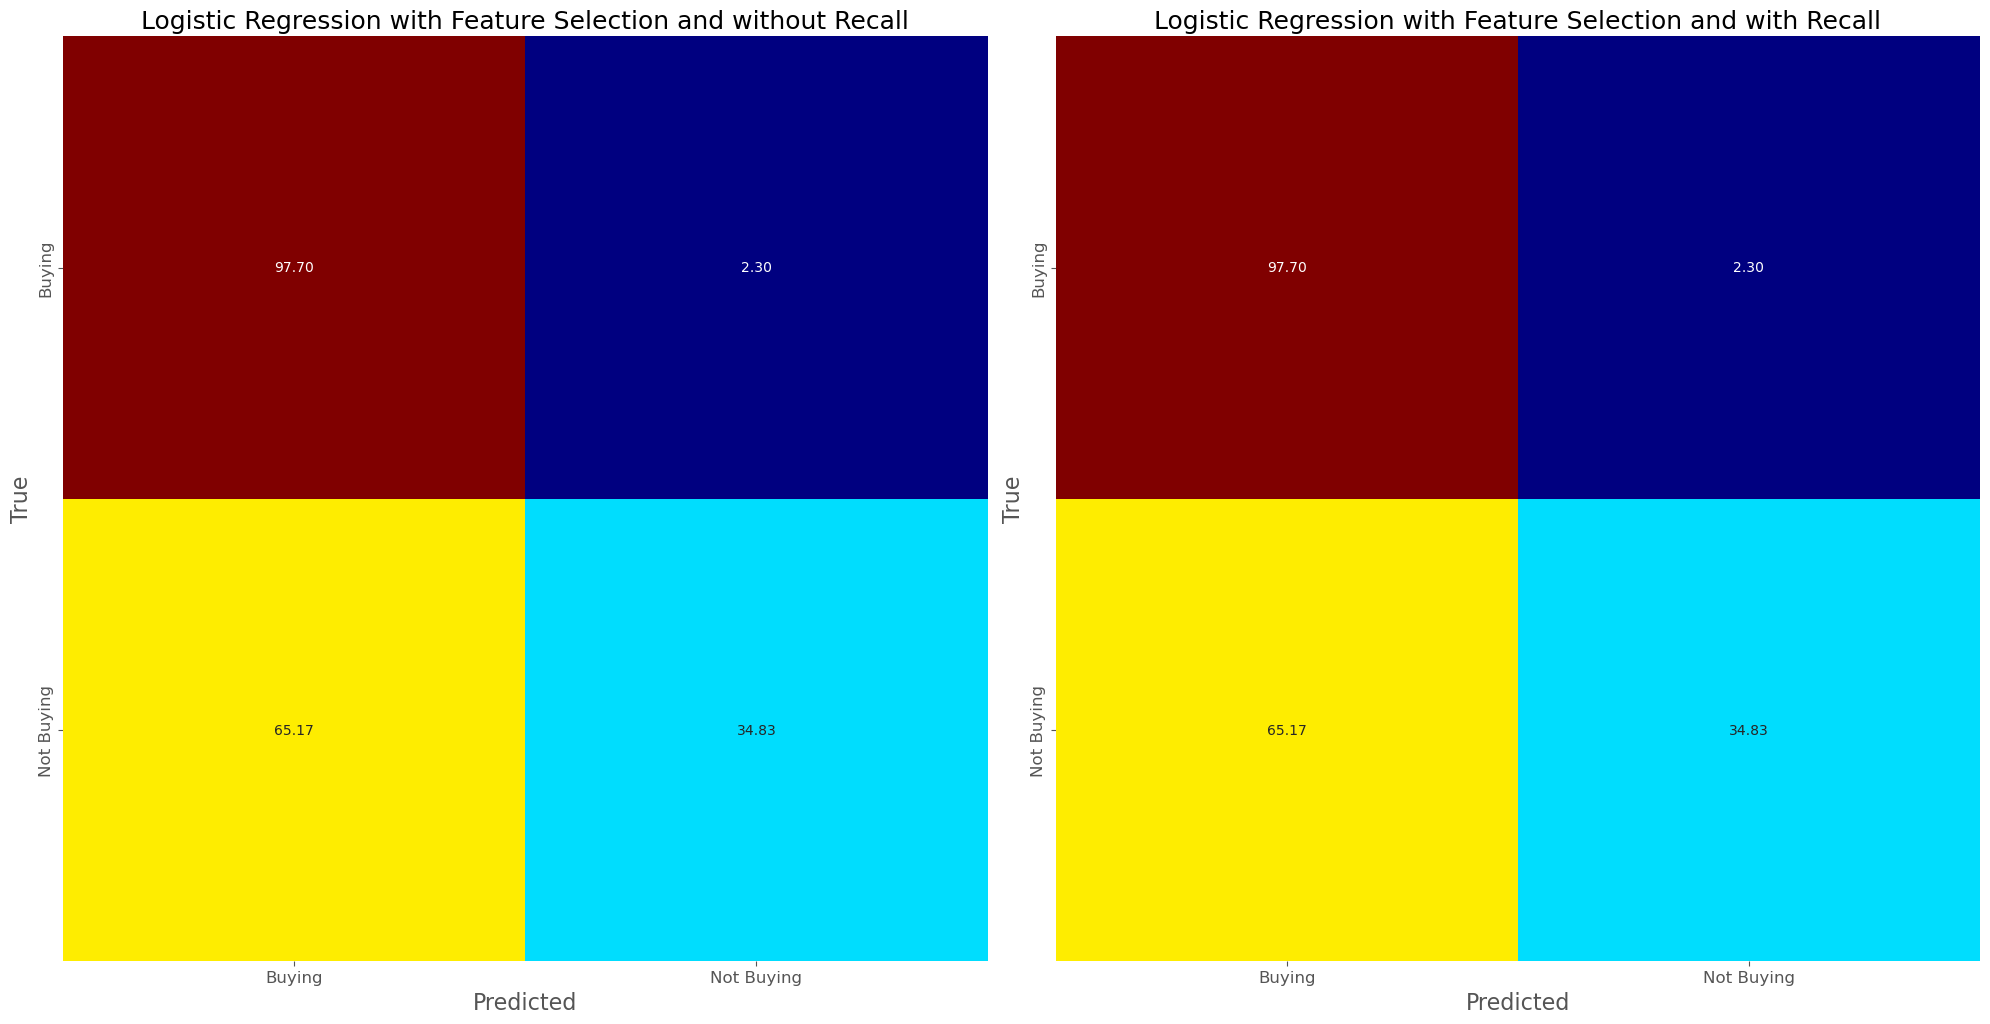

In [337]:
# Compute and normalize confusion matrix for the first model (without recall optimization)
cm_withoutRecall = confusion_matrix(y_test, Log_pred_withfeaturewithoutrecall)
cm_percent_withoutRecall = cm_withoutRecall / cm_withoutRecall.sum(axis=1)[:, np.newaxis] * 100

# Compute and normalize confusion matrix for the second model (with recall optimization)
cm_withRecall = confusion_matrix(y_test, Log_pred_withfeaturewithrecall)
cm_percent_withRecall = cm_withRecall / cm_withRecall.sum(axis=1)[:, np.newaxis] * 100

# Create a figure with two subplots to compare confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Plot confusion matrix for the first model (with feature selection)
sns.heatmap(cm_percent_withoutRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=16)
axes[0].set_ylabel('True', fontsize=16)
axes[0].set_title('Logistic Regression with Feature Selection and without Recall', fontsize=18)
axes[0].set_xticklabels(['Buying', 'Not Buying'], fontsize=12)
axes[0].set_yticklabels(['Buying', 'Not Buying'], fontsize=12)

# Plot confusion matrix for the second model (with recall)
sns.heatmap(cm_percent_withRecall, cmap=plt.cm.jet, square=True, annot=True, fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=16)
axes[1].set_ylabel('True', fontsize=16)
axes[1].set_title('Logistic Regression with Feature Selection and with Recall', fontsize=18)
axes[1].set_xticklabels(['Buying', 'Not Buying'], fontsize=12)
axes[1].set_yticklabels(['Buying', 'Not Buying'], fontsize=12)

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()
# Display the plots
plt.show()

General Insights:
- False Positives (FP): 2.30% of sessions that did not result in a sale were incorrectly predicted as revenue-positive.
- False Negatives (FN): 65.17% of sessions that resulted in revenue were missed and incorrectly predicted as no-revenue sessions.
- Recall Impact: Adding recall did not affect the model's performance, suggesting that the recall adjustment had no impact on the predictions.


### ROC Curve without Feature Selection

In [340]:
# Apply feature transformation to the training data
X_train_transformed = transformer.fit_transform(X_train)
# Apply the same transformation to the test data (without fitting again)
X_test_transformed = transformer.transform(X_test)

In [341]:
# Get feature names after transformation
feature_names = (
    transformer.get_feature_names_out() # Use get_feature_names_out() if the transformer supports it
    if hasattr(transformer, "get_feature_names_out") 
    else numericals + list(transformer.named_transformers_['categorical'].get_feature_names_out())
    # If get_feature_names_out() is not available, manually retrieve numerical and categorical feature names
)

# Convert the transformed NumPy array to a DataFrame with proper column names
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

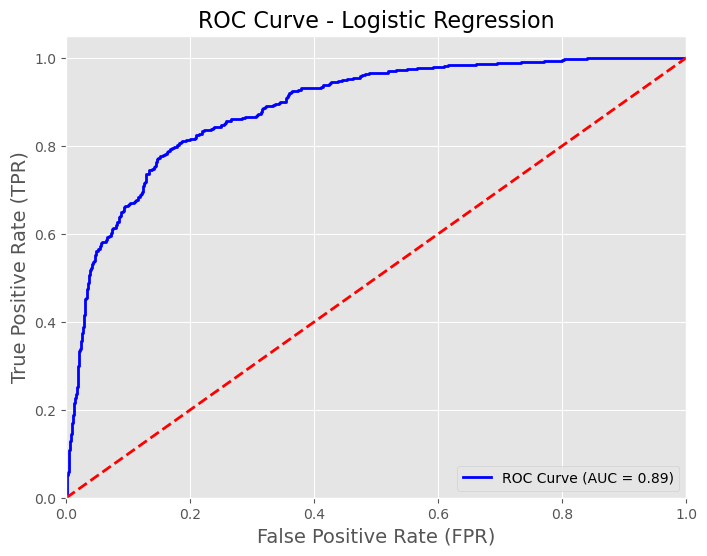

In [342]:
from sklearn.metrics import roc_curve, auc  # <-- Import library for ROC curve

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_transformed, y_train)

# Predict probabilities for the positive class (Revenue = 1)
y_prob = log_reg.predict_proba(X_test_transformed)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds for ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)  # Calculate Area Under the Curve (AUC)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')  # ROC curve
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Random classifier reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curve - Logistic Regression', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The ROC curve without feature selection shows the logistic regression model's performance in predicting purchase intention, with an AUC of 0.89, reflecting strong discriminative power when using all available features.

### ROC Curve with Feature Selection - Forward Feature Selection

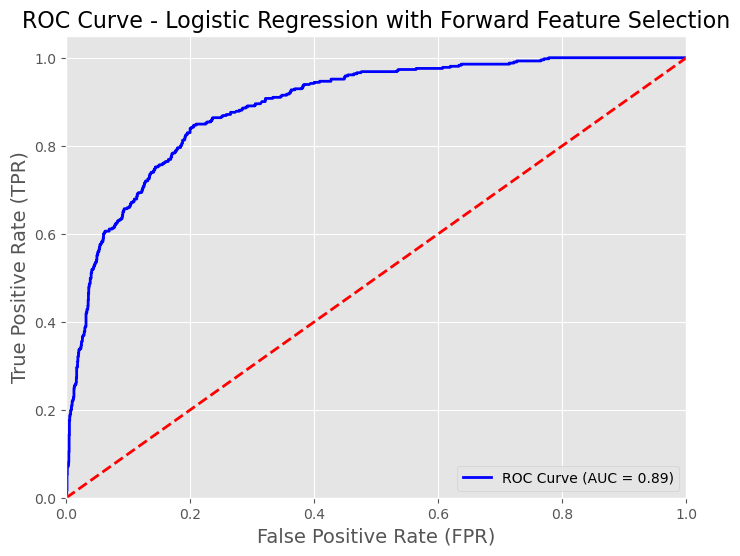

In [345]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Assuming df is the dataset
# Split your data into features (X) and target (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue'].replace({'Yes': 1, 'No': 0})  # Convert target to 1 and 0

# Define categorical and numerical columns
categoricals = X.select_dtypes(include=['object', 'category']).columns.tolist()
numericals = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Define transformers for categorical and numerical columns
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder()
)

# Create the preprocessor pipeline (scaling numerical columns and encoding categorical columns)
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericals),
    ('cat', categorical_transformer, categoricals)
])

# Define forward feature selection with Logistic Regression
forward_selector = SequentialFeatureSelector(
    LogisticRegression(), direction='forward', n_features_to_select=10
)

# Define the pipeline with forward feature selection and Logistic Regression
log_reg_pipeline = make_pipeline(
    preprocessor,
    forward_selector,  # Added forward feature selection step
    LogisticRegression()
)

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
log_reg_pipeline.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (Revenue = 1)
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds for ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')  # ROC curve
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Random classifier reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curve - Logistic Regression with Forward Feature Selection', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


After forward feature selection, the ROC curve maintains an AUC of 0.89, indicating that the model achieves the same strong classification accuracy while reducing feature noise and improving interpretability.

# Prediction Evaluation 
In this section, we process and analyze multiple classification models (SVM, SVC, and Logistic Regression) to evaluate their performance based on key metrics: **Accuracy**, **Recall**, **Precision**, and **F1 Score**. We have identified the **winner model** using these as our metrics.

- **Accuracy** measures the overall proportion of correct predictions, indicating how well the model classifies both shoppers who will make a purchase and those who will not.
- **Recall** focuses on identifying the **shoppers who will make a purchase**, measuring the proportion of actual positive cases (true buyers) correctly identified by the model.
- **Precision** measures how many of the shoppers predicted as likely to make a purchase actually make a purchase, helping evaluate how reliable the model is when predicting purchases.
- **F1 Score** combines both **Recall** and **Precision**, providing a balance between correctly identifying potential buyers and minimizing false positives, which is particularly useful when dealing with imbalanced classes like in shopper intention prediction.

In [348]:
df_copy = df.copy()

# Dictionary of dataframes with shorter names
df_dict = {
    "SVC without Feature without Recall": svc_withoutFeatures_withoutRecall,
    "SVC without Feature with Recall": svc_withoutFeatures_withRecall,
    "SVC with Feature without Recall": svc_withFeatures_withoutRecall,
    "SVC with Feature with Recall": svc_withFeatures_withRecall,
    "SVM without Feature without Recall": svm_withoutFeatures_withoutRecall,
    "SVM without Feature with Recall": svm_withoutFeatures_withRecall,
    "SVM with Feature without Recall": svm_withFeaturewithoutRecall,
    "SVM with Feature with Recall": svm_withFeaturewithRecall,
    "Log without Feature without Recall": Log_withoutfeaturewithoutrecall,
    "Log without Feature with Recall": Log_withoutfeaturewithrecall,
    "Log with Feature without Recall": Log_withfeaturewithoutrecall,
    "Log with Feature with Recall": Log_withfeaturewithrecall
}

# Transform each dataframe
df_list = []
for name, df_1 in df_dict.items():
    df_pivot = df_1.set_index("Metric").T  # Convert metric names into columns
    df_pivot["Model"] = name  # Add model name as a column
    df_list.append(df_pivot)

# Concatenate all dataframes
final_df = pd.concat(df_list, ignore_index=True)

# Reset index to remove 'Model' as index
final_df = final_df.reset_index(drop=True)

# Reorder columns to make 'Model' the second column
final_df = final_df[['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score']]

# Remove the row where "Model" is "Value"
final_df = final_df[final_df["Model"] != "Value"]

In [349]:
# Display final DataFrame
final_df

Metric                               Model   Accuracy     Recall  Precision  \
0       SVC without Feature without Recall  87.023520  37.914692  73.394495   
1          SVC without Feature with Recall  87.023520  37.914692  73.394495   
2          SVC with Feature without Recall  87.064071  37.677725  73.953488   
3             SVC with Feature with Recall  86.942417  37.203791  73.364486   
4       SVM without Feature without Recall  88.807786  53.791469  73.701299   
5          SVM without Feature with Recall  88.807786  53.791469  73.701299   
6          SVM with Feature without Recall  88.402271  51.184834  72.972973   
7             SVM with Feature with Recall  88.442822  70.853081  64.859002   
8       Log without Feature without Recall  87.064071  36.966825  74.641148   
9          Log without Feature with Recall  87.064071  36.966825  74.641148   
10         Log with Feature without Recall  86.942417  34.834123  75.773196   
11            Log with Feature with Recall  86.942417  34.834123  75.773196   

Metric   F1 Score  
0       50.000000  
1       50.000000  
2       49.921507  
3       49.371069  
4       62.191781  
5       62.191781  
6       60.167131  
7       67.723669  
8       49.445325  
9       49.445325  
10      47.727273  
11      47.727273

Model Performance Summary:
Above is the final table which we created containing the performance metrics for each model, including **Accuracy**, **Recall**, **Precision**, and **F1 Score**.

### Model Evaluation:
From the table above, we have calculated the highest scores across key performance metrics to determine the best model. The model with the highest overall performance will be selected as the winner.

In [352]:
# Calculate the Overall Score by summing Accuracy, Recall, Precision, and F1 Score
final_df['Overall Score'] = final_df['Accuracy'] + final_df['Recall'] + final_df['Precision'] + final_df['F1 Score']
# Identify the model with the highest Overall Score
winner_model = final_df.loc[final_df['Overall Score'].idxmax()]

In [353]:
# Print the name of the best model based on the highest Overall Score
print(f"The winner model based on all metrics is: {winner_model['Model']}")
print(winner_model)

The winner model based on all metrics is: SVM with Feature with Recall
Metric
Model            SVM with Feature with Recall
Accuracy                            88.442822
Recall                              70.853081
Precision                           64.859002
F1 Score                            67.723669
Overall Score                      291.878574
Name: 7, dtype: object


**Why all metrics?**  
We considered all four metrics to ensure a balanced evaluation, as each provides a unique perspective on model performance. This comprehensive approach allowed us to select a model that not only accurately identifies potential buyers but also delivers reliable predictions. It aligns with our objective of optimizing e-commerce strategies based on shopper behavior.

### Winner Model: SVM with Feature Selection
The **SVM (Support Vector Machine)** model with feature selection has been identified as the winner based on its performance metrics being the highest. This model demonstrates strong performance across all metrics, making it the best choice for our task.

### Purpose:
This step creates a final dataframe with the `Predicted` column for future analysis. We are using **SVM with Recall** and **feature selection** for accurate predictions.

We are generating a final dataframe with predicted values by:
- Using **SVM (Support Vector Machine)** for classification.
- Applying **feature selection** to focus on key features.
- Adding a new column (`Predicted`) to the dataframe.

The output is a dataframe with the original data and a new column called `Predicted`, which contains the model's predictions.

In [357]:
# Step 1: Prepare Data
X = df.drop('Revenue', axis=1)
y = df['Revenue'].replace({'Yes': 1, 'No': 0})

# Define categorical and numerical columns
categoricals = X.select_dtypes(include=['object', 'category']).columns.tolist()
numericals = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Define transformers
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False)
)

numerical_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numericals),
    ('cat', categorical_transformer, categoricals)
])

# Step 2: Transform dataset
X_transformed = preprocessor.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=numericals + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categoricals)))

# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=2)

# Step 4: Train SVM and Evaluate Permutation Importance
svm = SVC(kernel='rbf', random_state=2, probability=True)
svm.fit(X_train, y_train)

result = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=2)
perm_importance = pd.DataFrame({
    'Features': X_transformed.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Step 5: Forward Feature Selection and Pipeline
forward_selector = SequentialFeatureSelector(
    LogisticRegression(), direction='forward', n_features_to_select=5
)

svm_pipeline = make_pipeline(
    preprocessor,
    forward_selector,
    SVC(kernel='rbf')
)

# Step 6: Hyperparameter Grid and Cross-Validation
param_grid = {
    'svc__C': np.logspace(-1, 1, 2),
    'svc__gamma': np.logspace(-3, 2, 5)
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=kfold,
    scoring='recall',
    n_jobs=4
)

# Step 7: Train and Evaluate Best Model
grid_search.fit(X, y)
best_model = grid_search.best_estimator_
svm_pred_withFeaturewithRecall = best_model.predict(X)

# Step 8: Calculate Recall and Create Winner DataFrame
recall = recall_score(y, svm_pred_withFeaturewithRecall) * 100
print(f"Best Model Recall: {recall:.2f}%")

winner_model_df = pd.DataFrame(X, columns=X.columns)  # Create DataFrame from original features
winner_model_df['Revenue'] = y.values  # Add the original 'Revenue' column
winner_model_df['Predicted'] = svm_pred_withFeaturewithRecall  # Add predictions
winner_model_df['Recall (%)'] = recall  # Add recall as a new column for reference
# winner_model_df.drop(columns=['Revenue'], inplace=True)

Best Model Recall: 53.83%


In [358]:
winner_model_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor    False    False   
1        2       1            2  Returning_Visitor    False    False   
2        1       9            3  Returning_Visitor    False    False   
3        2       2            4  Returning_Visitor    False    False   
4        3       1            4  Returning_Visitor     True    False   

   Predicted  Recall (%)  
0      False   53.825996  
1      False   53.825996  
2      False   53.825996  
3      False   53.825996  
4      False   53.825996

## Feature Importance

### Most Important Features

In [361]:
# Print the top 10 features based on their permutation importance
print("Top 10 Features from SVM (winner model- Permutation Importance):")
perm_importance.head(10) # Display the top 10 features ranked by importance

Top 10 Features from SVM (winner model- Permutation Importance):


Features  Importance
8                PageValues    0.103001
4            ProductRelated    0.003204
7                 ExitRates    0.003001
3    Informational_Duration    0.002920
5   ProductRelated_Duration    0.002271
6               BounceRates    0.002149
2             Informational    0.001500
0            Administrative    0.001379
14                  Weekend    0.001257
13              TrafficType    0.001217

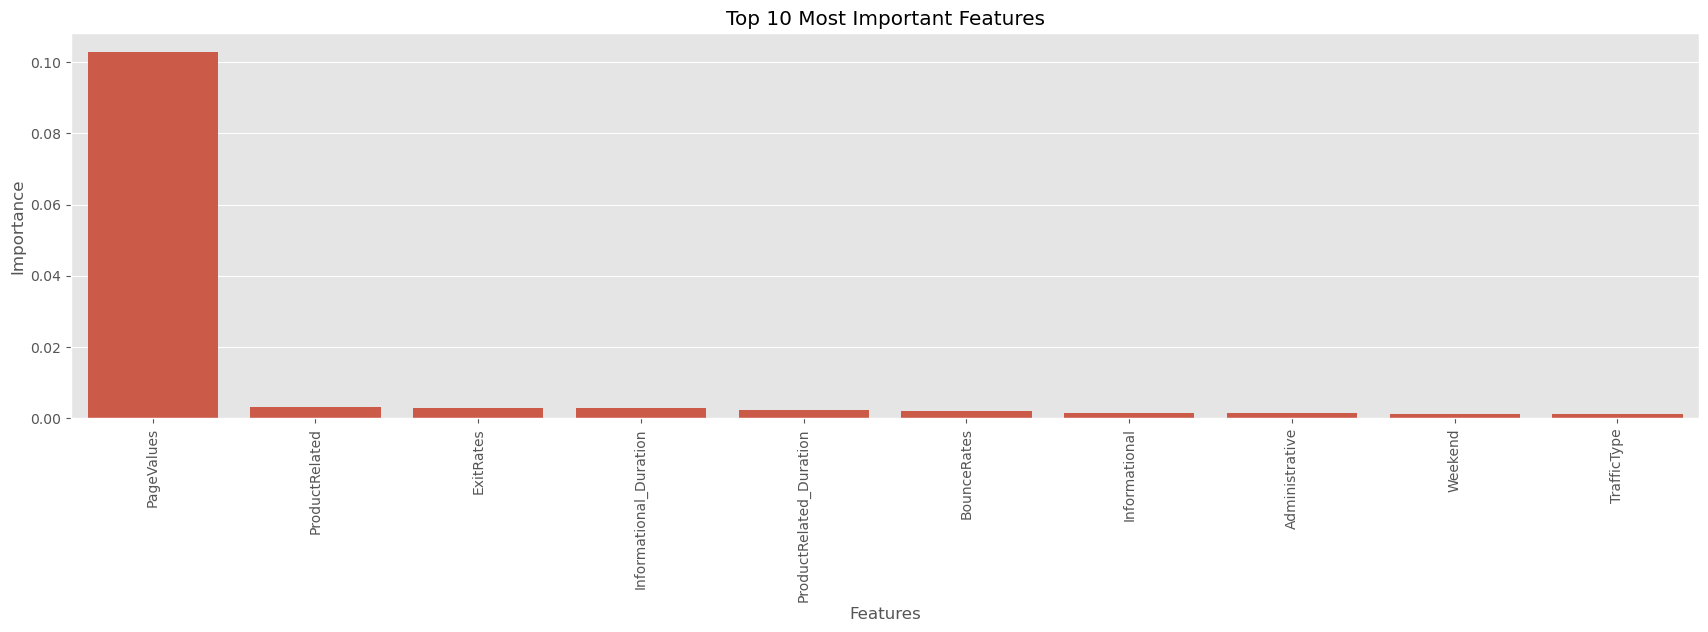

In [362]:
# Plot the top 10 most important features based on permutation importance
plt.figure(figsize=(21, 5)) # Set figure size
sns.barplot(
    x='Features', # Features on the x-axis
    y='Importance', # Importance on the y-axis
    data=perm_importance.sort_values(by='Importance', ascending=False).head(10) # Top 10 features sorted by importance
)
# Set plot title and axis labels
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()  # Display the plot

Top 10 Important Features:
The barplot above visualizes the **top 10 most important features** based on their contribution to the model. These features play a significant role in driving predictions and understanding the underlying patterns in the data.

### Less Impactful Features

In [365]:
# Print features that add the least value (i.e., those with the lowest importance scores)
print('Features adding least value / areas not to be focussed on :')
print()
print(perm_importance.sort_values(by='Importance',ascending=False).tail(10)['Features'].values)

Features adding least value / areas not to be focussed on :

['Month_Feb' 'Month_June' 'Administrative_Duration' 'Month_Oct'
 'Month_Sep' 'Browser' 'VisitorType_Other' 'Month_Aug' 'Month_Jul'
 'SpecialDay']


Features with lower Value:
similarly above we have a list of features that contribute the least to the model's performance. These features may not be impactful and can be considered as areas **not to focus on** for future analysis or optimization.

## Conclusion Based on Important Features

#### Key Influential Features:
- **PageValues** – The most critical factor, indicating that the value of pages visited has a strong impact on predicting whether a user will make a purchase (Revenue = 1). A higher PageValues score suggests a user is more engaged and likely to convert.
- **ProductRelated & ProductRelated_Duration** – Users who browse and spend more time on product-related pages are more inclined to purchase.
- **ExitRates & BounceRates** – High ExitRates and BounceRates negatively impact conversion. If users frequently exit without deep engagement, they are less likely to complete a transaction.
- **Month_Nov & Month_May** – Sessions in November and May show higher importance, suggesting seasonal trends in user behavior.
- **Administrative** – Navigation through administrative pages (e.g., login, account settings) has a minor but notable impact.
- **OperatingSystems & Informational** – The operating system and informational content have minimal influence on conversions.


# Next Steps.
Recommending how to improve in business perspective.

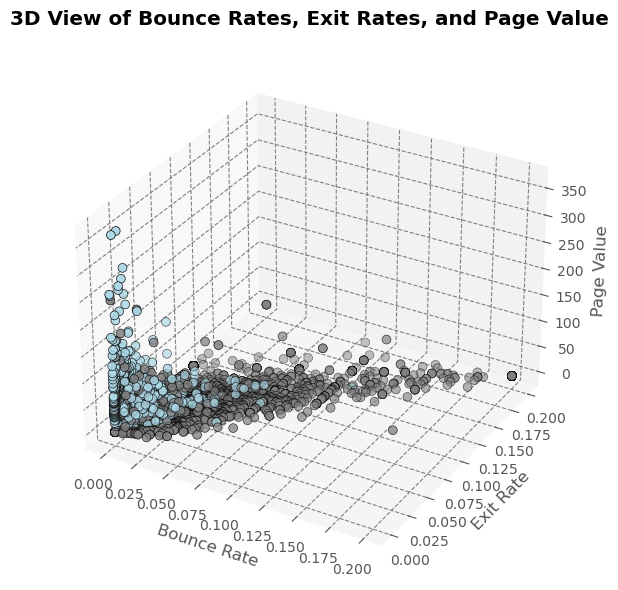

In [369]:
# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', facecolor='white')  # Set white background

# Define custom colors for Revenue = True (Light Blue) and Revenue = False (Grey)
colors = winner_model_df['Revenue'].replace({False: 'grey', True: 'lightblue'})

# Scatter plot with 'BounceRates', 'ExitRates', and 'PageValues'
ax.scatter(winner_model_df['BounceRates'], 
           winner_model_df['ExitRates'], 
           winner_model_df['PageValues'], 
           c=colors,           
           edgecolor='k',      
           s=40)

# Set plot title and axis labels with padding
ax.set_title("3D View of Bounce Rates, Exit Rates, and Page Value", fontweight='bold', pad=20)
ax.set_xlabel("Bounce Rate")
ax.set_ylabel("Exit Rate")
ax.set_zlabel("Page Value")

# Customize grid lines
ax.xaxis._axinfo['grid'].update(color='grey', linestyle='--')
ax.yaxis._axinfo['grid'].update(color='grey', linestyle='--')
ax.zaxis._axinfo['grid'].update(color='grey', linestyle='--')

# Adjust layout for clarity
plt.tight_layout()

# Show plot
plt.show()


## Insights from the above Graph:
- LightBlue Points: Users who made a purchase (Revenue = True). This indicates they have Low Bounce Rates, Low Exit Rates, and High Page Values (they explore more pages). These users are highly engaged.

- Grey Points: Users who did not make a purchase (Revenue = False). This indicates they have High Bounce Rates, High Exit Rates, and Low Page Values (they leave quickly). These users are less engaged.

## Scope for Improvement:
Due to time constraints, we used:
1. Regularization Strength (C): Limited to np.logspace(-1, 1, 2) for faster training.

2. Feature Selection (SelectKBest): Set k=5 to focus on the top 5 features, reducing dimensionality.

Future Improvements:
With more time and resources:

1. Expand C to np.logspace(-3, 3, 10).

2. Test more k values in SelectKBest.

Use exhaustive grid search or randomized search for better tuning.

## Next steps
- Focus on LightBlue Points (Converters): Learn from Converters: Analyze the behavior of users who convert (e.g., pages visited, traffic sources).

- Address Grey Points (Non-Converters): Find Out Why: Investigate reasons for high bounce and exit rates, such as poor user experience, irrelevant content, or slow page load        times.

# Business Insights & Recommendations:
- Optimize High-Impact Pages: Improve PageValues by enhancing content and adding personalized recommendations
- Reduce Exit and Bounce Rates: Improve navigation and engage users better to reduce drop-offs.
- Leverage Product-Related Content: Enhance product pages with detailed descriptions, images, videos, and reviews to boost engagement and      conversions.
- Seasonal Trends: Run targeted campaigns during months except November and May (as they already have higher revenue) to capitalize on         engagement.
- Improve Engagement: Enhance website design, offer incentives (e.g., discounts), and personalize content to retain users.